In [2]:
#importing libraries
import pandas as pd
import csv
import urllib.request

In [3]:
df =pd.read_csv(r"C:/Users/saira/Desktop/blackcoffer/Data Science/cik_list.csv", delimiter = ',')

In [4]:
#adding 'https://www.sec.gov/Archives/ to every cells of column SECFNAME(cik_list.xlsx) to access link to the financial report. '
df['SECFNAME'] ='https://www.sec.gov/Archives/' +df['SECFNAME'].astype(str)
#saving the dataframe to another file
df.to_csv("cik_list1.csv")

In [5]:
#Stored with link in cik_list1 in [SECFNAME]
files_store =r'C:/Users/saira/Desktop/blackcoffer/Data Science/cik_list1.csv'

In [181]:
#downlaoding filing file from the web
cikListFile = pd.read_csv(files_store)
for index, row in cikListFile.iterrows():
    processing_file=row['SECFNAME'].split('/')
    url =row['SECFNAME']
    inputFile = processing_file[7]
    name = str(inputFile)
    urllib.request.urlretrieve(url, 'C:/Users/saira/Desktop/blackcoffer/Data Science/files/'+name) 

# Extracting and Analyzing the Data

In [6]:
#importing library
import os
import re
import pandas as pd
from nltk.tokenize import RegexpTokenizer, sent_tokenize
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Text extraction patterns
mda_regex = r"item[^a-zA-Z\n]*\d\s*\.\s*management\'s discussion and analysis.*?^\s*item[^a-zA-Z\n]*\d\s*\.*"
qqd_regex = r"item[^a-zA-Z\n]*\d[a-z]?\.?\s*Quantitative and Qualitative Disclosures about " \
            r"Market Risk.*?^\s*item\s*\d\s*"
riskfactor_regex = r"item[^a-zA-Z\n]*\d[a-z]?\.?\s*Risk Factors.*?^\s*item\s*\d\s*"

In [8]:
# Filepath locations of all files
stopWordsFile = r'StopWords_Generic.txt'
positiveWordsFile = r'PositiveWords.txt'
negitiveWordsFile = r'NegativeWords.txt'
uncertainty_dictionaryFile = r'uncertainty_dictionary.txt'
constraining_dictionaryFile = r'constraining_dictionary.txt'

# 1.1 Cleaning Using Stop Words


### Dictionary of Stop words


In [11]:
#Loading stop words dictionary
with open(stopWordsFile ,'r') as stop_words:
    stopWords = stop_words.read().lower().split('\n')
print(stopWords)
stopWords[-1:] = []



['about', 'above', 'after', 'again', 'all', 'am', 'among', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'did', 'do', 'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'if', 'in', 'into', 'is', 'it', 'its', 'itself', 'just', 'me', 'more', 'most', 'my', 'myself', 'no', 'nor', 'not', 'now', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', 'she', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 'was', 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'with', 'you', 'your', 'yours', 'yourself', 'yourselves']


## Creating Tokenizer for Tokenize the text into word or coverting the text into a list of tokens

In [12]:
# Tokenizer
def tokenizer(text):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text.lower())
    filtered_words = list(filter(lambda token: token not in stopWords, tokens))
    return filtered_words

## Total words after Cleaning

In [13]:
#Function for counting total words
def total_word_count(text):
    tokens = tokenizer(text)
    print(len(tokens))
    return len(tokens)

# 1.2 Creating Dictionary For Negative And Postitive Words

### Dictionary For Negative Word

In [14]:
# Loading negative words
with open(negitiveWordsFile ,'r') as negfile:
    negativeWordList=negfile.read().lower().split('\n')
print(negativeWordList)

['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational', 'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish', 'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences', 'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness', 'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse', 'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing', 'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate', 'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries', 'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'afte

### Dictionary for Postive Word

In [15]:
with open(positiveWordsFile,'r') as posfile:    
    positiveWordList=posfile.read().lower().split('\n')
print(positiveWordList)

['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes', 'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement', 'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances', 'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages', 'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained', 'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful', 'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted', 'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming', 'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate', 'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations', 'collaborative', 'collaborator', 'collaborators', 'compliment', 'complime

# 1.3 Extracting Derived Variables

### Calculating Positive Score

In [16]:
#function to calculate positive score 
def positive_score(text):
    countPositive = 0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in positiveWordList:
            countPositive  += 1
    
    sumPositive = countPositive
    return sumPositive

### Calculating  Negative Score

In [17]:
#function ot calculate negative score
def negative_word(text):
    countNegative=0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in negativeWordList:
            countNegative -=1
    sumNegative = countNegative 
    sumNegative = sumNegative * -1
    return sumNegative

### Calculating Polarity Score


In [18]:
#function for calculating polarity score
def polarity_score(positiveScore, negativeScore):
    pol_score = (positiveScore - negativeScore) / ((positiveScore + negativeScore) + 0.000001)
    return pol_score

### Calculating Subjectivity score

In [19]:
#function for calculating polarity score
def subjectivity_score(positiveScore, negativeScore, text):
    subj_score = (positiveScore - negativeScore) / total_word_count(text)
    return subj_score

# 2 Analysis of Readability

  ### Calculating Average Sentence Per Length

  ##### Average Sentence Length = the number of words / the number of sentences

In [20]:
#function for caluculating average sentence length
def average_sentence_length(text):
    sentence_list = sent_tokenize(text)
    tokens = tokenizer(text)
    totalWordCount = len(tokens)
    totalSentences = len(sentence_list)
    average_sent = 0
    if totalSentences != 0:
        average_sent = totalWordCount / totalSentences
    
    average_sent_length= average_sent
    
    return round(average_sent_length)

### Calculating percentage of Complex Word

##### Percentage of Complex words = the number of complex words / the number of words 


In [21]:
#function for calculating percentage of complex word 
def percentage_complex_word(text):
    tokens = tokenizer(text)
    complexWord = 0
    complex_word_percentage = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    if len(tokens) != 0:
        complex_word_percentage = complexWord/len(tokens)
    
    return complex_word_percentage

### Calculating FOG Index

##### Fog Index = 0.4 * (Average Sentence Length + Percentage of Complex words)

In [22]:
#function for calculaitng fog index
def fog_index(averageSentenceLength, percentageComplexWord):
    fogIndex = 0.4 * (averageSentenceLength + percentageComplexWord)
    return fogIndex

# 3	Average Number of Words Per Sentence

### Calculating average number of words per sentence

##### Average Number of Words Per Sentence = the total number of words / the total number of sentences

In [23]:
#function for calculating average number of words
def average_word_length(text):
    sentence_list = sent_tokenize(text)
    tokens = tokenizer(text)
    totalWordCount = len(tokens)
    totalSentences = len(sentence_list)
    average_word = 0
    if totalSentences != 0:
        average_word = totalWordCount / totalSentences
    
    average_word_length= average_word
    
    return round(average_word_length)

# Calculating Percentage of Complex word


In [24]:
#Function for calculating percentage of Complex word
def complex_word_count(text):
    tokens = tokenizer(text)
    complexWord = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    return complexWord

# 4	Complex Word Count

### Calculating Complex Words

In [25]:
#function for couting complex words
def complex_word_count(text):
    tokens = tokenizer(text)
    complexWord = 0
    
    for word in tokens:
        vowels=0
        if word.endswith(('es','ed')):
            pass
        else:
            for w in word:
                if(w=='a' or w=='e' or w=='i' or w=='o' or w=='u'):
                    vowels += 1
            if(vowels > 2):
                complexWord += 1
    return complexWord

# Word Count

In [26]:
#Function for counting total words
def total_word_count(text):
    tokens = tokenizer(text)
    return len(tokens)

## Loading Uncertanity File


In [27]:
with open(uncertainty_dictionaryFile ,'r') as uncertain_dict:
    uncertainDict=uncertain_dict.read().lower()
uncertainDictionary = uncertainDict.split('\n')
print(uncertainDictionary)

['word', 'abeyance', 'abeyances', 'almost', 'alteration', 'alterations', 'ambiguities', 'ambiguity', 'ambiguous', 'anomalies', 'anomalous', 'anomalously', 'anomaly', 'anticipate', 'anticipated', 'anticipates', 'anticipating', 'anticipation', 'anticipations', 'apparent', 'apparently', 'appear', 'appeared', 'appearing', 'appears', 'approximate', 'approximated', 'approximately', 'approximates', 'approximating', 'approximation', 'approximations', 'arbitrarily', 'arbitrariness', 'arbitrary', 'assume', 'assumed', 'assumes', 'assuming', 'assumption', 'assumptions', 'believe', 'believed', 'believes', 'believing', 'cautious', 'cautiously', 'cautiousness', 'clarification', 'clarifications', 'conceivable', 'conceivably', 'conditional', 'conditionally', 'confuses', 'confusing', 'confusingly', 'confusion', 'contingencies', 'contingency', 'contingent', 'contingently', 'contingents', 'could', 'crossroad', 'crossroads', 'depend', 'depended', 'dependence', 'dependencies', 'dependency', 'dependent', 'de

### Calculating Uncertainity Score

In [28]:
#function for calculating uncertainity score
def uncertainty_score(text):
    uncertainWordnum =0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in uncertainDictionary:
            uncertainWordnum +=1
    sumUncertainityScore = uncertainWordnum 
    
    return sumUncertainityScore

## Loading Constraining File


In [29]:
with open(constraining_dictionaryFile ,'r') as constraining_dict:
    constrainDict=constraining_dict.read().lower()
constrainDictionary = constrainDict.split('\n')
print(constrainDictionary)

['abide', 'abiding', 'bound', 'bounded', 'commit', 'commitment', 'commitments', 'commits', 'committed', 'committing', 'compel', 'compelled', 'compelling', 'compels', 'comply', 'compulsion', 'compulsory', 'confine', 'confined', 'confinement', 'confines', 'confining', 'constrain', 'constrained', 'constraining', 'constrains', 'constraint', 'constraints', 'covenant', 'covenanted', 'covenanting', 'covenants', 'depend', 'dependance', 'dependances', 'dependant', 'dependencies', 'dependent', 'depending', 'depends', 'dictate', 'dictated', 'dictates', 'dictating', 'directive', 'directives', 'earmark', 'earmarked', 'earmarking', 'earmarks', 'encumber', 'encumbered', 'encumbering', 'encumbers', 'encumbrance', 'encumbrances', 'entail', 'entailed', 'entailing', 'entails', 'entrench', 'entrenched', 'escrow', 'escrowed', 'escrows', 'forbade', 'forbid', 'forbidden', 'forbidding', 'forbids', 'impair', 'impaired', 'impairing', 'impairment', 'impairments', 'impairs', 'impose', 'imposed', 'imposes', 'impos

### Calculating Constraining Score

In [30]:
#function for calculating Constraining score
def constraining_score(text):
    constrainWordnum =0
    rawToken = tokenizer(text)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnum +=1
    sumConstrainScore = constrainWordnum 
    
    return sumConstrainScore

## Calculating positive word proportion


In [31]:
#function for positive word proportion
def positive_word_prop(positiveScore,wordcount):
    positive_word_proportion = 0
    if wordcount !=0:
        positive_word_proportion = positiveScore / wordcount
        
    return positive_word_proportion

## Calculating negative word proportion

In [32]:
#function for negative word proportion 
def negative_word_prop(negativeScore,wordcount):
    negative_word_proportion = 0
    if wordcount !=0:
        negative_word_proportion = negativeScore / wordcount
        
    return negative_word_proportion

## Calculating Uncertain Word Proportion


In [33]:
#function for uncertain word proportion
def uncertain_word_prop(uncertainScore,wordcount):
    uncertain_word_proportion = 0
    if wordcount !=0:
        uncertain_word_proportion = uncertainScore / wordcount
        
    return uncertain_word_proportion

## Calculating Constraining Word Proportion

In [34]:
#function for Constraining Word Proportion
def constraining_word_prop(constrainingScore,wordcount):
    constraining_word_proportion = 0
    if wordcount !=0:
        constraining_word_proportion = constrainingScore / wordcount
        
    return constraining_word_proportion

## Calculating Constraining words Over the Whole report

In [35]:
#function for Constraining words Over the Whole report
def constrain_word_whole(mdaText,qqdmrText,rfText):
    wholeDoc = mdaText + qqdmrText + rfText
    constrainWordnumWhole =0
    rawToken = tokenizer(wholeDoc)
    for word in rawToken:
        if word in constrainDictionary:
            constrainWordnumWhole +=1
    sumConstrainScoreWhole = constrainWordnumWhole 
    
    return sumConstrainScoreWhole

In [50]:
#function for extracting data
def rawdata_extract(path, cikListFile):
    html_regex = re.compile(r'<.*?>')
    extraxted_data=[]
    
    
    cikListFile = pd.read_csv(cikListFile)
    for index, row in cikListFile.iterrows():
        processingFile=row['SECFNAME'].split('/')
        inputFile = processingFile[3]
        cik=row['CIK']
        coname=row['CONAME']
        fyrmo=row['FYRMO']
        fdate = row['FDATE']
        form = row['FORM']
        secfname=row['SECFNAME']
        for fileName in os.listdir(path):
            filenameopen = os.path.join(path, fileName)
            dirFileName = filenameopen.split('\\')
            currentFile=dirFileName[1]

            if os.path.isfile(filenameopen) and currentFile == inputFile :
                resultdict = dict()
                resultdict['CIK'] = cik
                resultdict['CONAME'] = coname
                resultdict['FYRMO'] = fyrmo
                resultdict['FDATE'] = fdate
                resultdict['FORM'] = form
                resultdict['SECFNAME'] = secfname
                
                with open(filenameopen, 'r', encoding='utf-8', errors="replace") as in_file:
                    content = in_file.read()
                    content = re.sub(html_regex,'',content)
                    content = content.replace('&nbsp;','')
                    content = re.sub(r'&#\d+;', '', content)
                    matches_mda = re.findall(mda_regex, content, re.IGNORECASE | re.DOTALL | re.MULTILINE)
                    if matches_mda:
                        result = max(matches_mda, key=len)
                        result = str(result).replace('\n', '')
                        resultdict['mda_extract'] = result
                    else:
                        resultdict['mda_extract'] = ""
                    match_qqd = re.findall(qqd_regex, content, re.IGNORECASE | re.DOTALL | re.MULTILINE)
                    if match_qqd:
                        result_qqd = max(match_qqd, key=len)
                        result_qqd = str(result_qqd).replace('\n','')
                        resultdict['qqd_extract']= result_qqd
                    else:
                        resultdict['qqd_extract'] = ""
                    match_riskfactor = re.findall(riskfactor_regex, content, re.IGNORECASE | re.DOTALL | re.MULTILINE)
                    if match_riskfactor:
                        result_riskfactor = max(match_riskfactor, key=len)
                        result_riskfactor = str(result_riskfactor).replace('\n', '')
                        resultdict['riskfactor_extract'] = result_riskfactor
                    else:
                        resultdict['riskfactor_extract'] = ""
                    extraxted_data.append(resultdict)

                in_file.close()

    return extraxted_data

In [52]:
inputDirectory = r'C:/Users/saira/Desktop/blackcoffer/Data Science/files'
masterFile = r'C:/Users/saira/Desktop/blackcoffer/Data Science/cik_list.csv'
dataList = rawdata_extract( inputDirectory , masterFile )
df = pd.DataFrame(dataList)

In [53]:
 df

,CIK,CONAME,FDATE,FORM,FYRMO,SECFNAME,mda_extract,qqd_extract,riskfactor_extract
0,3662,SUNBEAM CORP/FL/,03/06/1998,10-K405,199803,edgar/data/3662/0000950170-98-000413.txt,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
1,3662,SUNBEAM CORP/FL/,05/15/1998,10-Q,199805,edgar/data/3662/0000950170-98-001001.txt,ITEM 2. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
2,3662,SUNBEAM CORP/FL/,08/13/1998,NT 10-Q,199808,edgar/data/3662/0000950172-98-000783.txt,,,
3,3662,SUNBEAM CORP/FL/,11/12/1998,10-K/A,199811,edgar/data/3662/0000950170-98-002145.txt,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
4,3662,SUNBEAM CORP/FL/,11/16/1998,NT 10-Q,199811,edgar/data/3662/0000950172-98-001203.txt,,,
5,3662,SUNBEAM CORP/FL/,11/25/1998,10-Q/A,199811,edgar/data/3662/0000950170-98-002278.txt,ITEM 2. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
6,3662,SUNBEAM CORP/FL/,12/22/1998,10-Q,199812,edgar/data/3662/0000950170-98-002401.txt,ITEM 2. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
7,3662,SUNBEAM CORP/FL/,12/22/1998,10-Q,199812,edgar/data/3662/0000950170-98-002402.txt,ITEM 2. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,
8,3662,SUNBEAM CORP/FL/,03/31/1999,NT 10-K,199903,edgar/data/3662/0000950172-99-000362.txt,,,
9,3662,SUNBEAM CORP/FL/,05/11/1999,10-K,199905,edgar/data/3662/0000950170-99-000775.txt,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,


In [54]:
df['mda_positive_score'] = df.mda_extract.apply(positive_score)
df['mda_negative_score'] = df.mda_extract.apply(negative_word)
df['mda_polarity_score'] = np.vectorize(polarity_score)(df['mda_positive_score'],df['mda_negative_score'])
df['mda_average_sentence_length'] = df.mda_extract.apply(average_sentence_length)
df['mda_percentage_of_complex_words'] = df.mda_extract.apply(percentage_complex_word)
df['mda_fog_index'] = np.vectorize(fog_index)(df['mda_average_sentence_length'],df['mda_percentage_of_complex_words'])
df['mda_complex_word_count']= df.mda_extract.apply(complex_word_count)
df['mda_word_count'] = df.mda_extract.apply(total_word_count)
df['mda_uncertainty_score']=df.mda_extract.apply(uncertainty_score)
df['mda_constraining_score'] = df.mda_extract.apply(constraining_score)
df['mda_positive_word_proportion'] = np.vectorize(positive_word_prop)(df['mda_positive_score'],df['mda_word_count'])
df['mda_negative_word_proportion'] = np.vectorize(negative_word_prop)(df['mda_negative_score'],df['mda_word_count'])
df['mda_uncertainty_word_proportion'] = np.vectorize(uncertain_word_prop)(df['mda_uncertainty_score'],df['mda_word_count'])
df['mda_constraining_word_proportion'] = np.vectorize(constraining_word_prop)(df['mda_constraining_score'],df['mda_word_count'])

df['qqdmr_positive_score'] = df.qqd_extract.apply(positive_score)
df['qqdmr_negative_score'] = df.qqd_extract.apply(negative_word)
df['qqdmr_polarity_score'] = np.vectorize(polarity_score)(df['qqdmr_positive_score'],df['qqdmr_negative_score'])
df['qqdmr_average_sentence_length'] = df.qqd_extract.apply(average_sentence_length)
df['qqdmr_percentage_of_complex_words'] = df.qqd_extract.apply(percentage_complex_word)
df['qqdmr_fog_index'] = np.vectorize(fog_index)(df['qqdmr_average_sentence_length'],df['qqdmr_percentage_of_complex_words'])
df['qqdmr_complex_word_count']= df.qqd_extract.apply(complex_word_count)
df['qqdmr_word_count'] = df.qqd_extract.apply(total_word_count)
df['qqdmr_uncertainty_score']=df.qqd_extract.apply(uncertainty_score)
df['qqdmr_constraining_score'] = df.qqd_extract.apply(constraining_score)
df['qqdmr_positive_word_proportion'] = np.vectorize(positive_word_prop)(df['qqdmr_positive_score'],df['qqdmr_word_count'])
df['qqdmr_negative_word_proportion'] = np.vectorize(negative_word_prop)(df['qqdmr_negative_score'],df['qqdmr_word_count'])
df['qqdmr_uncertainty_word_proportion'] = np.vectorize(uncertain_word_prop)(df['qqdmr_uncertainty_score'],df['qqdmr_word_count'])
df['qqdmr_constraining_word_proportion'] = np.vectorize(constraining_word_prop)(df['qqdmr_constraining_score'],df['qqdmr_word_count'])

df['rf_positive_score'] = df.riskfactor_extract.apply(positive_score)
df['rf_negative_score'] = df.riskfactor_extract.apply(negative_word)
df['rf_polarity_score'] = np.vectorize(polarity_score)(df['rf_positive_score'],df['rf_negative_score'])
df['rf_average_sentence_length'] = df.riskfactor_extract.apply(average_sentence_length)
df['rf_percentage_of_complex_words'] = df.riskfactor_extract.apply(percentage_complex_word)
df['rf_fog_index'] = np.vectorize(fog_index)(df['rf_average_sentence_length'],df['rf_percentage_of_complex_words'])
df['rf_complex_word_count']= df.riskfactor_extract.apply(complex_word_count)
df['rf_word_count'] = df.riskfactor_extract.apply(total_word_count)
df['rf_uncertainty_score']=df.riskfactor_extract.apply(uncertainty_score)
df['rf_constraining_score'] = df.riskfactor_extract.apply(constraining_score)
df['rf_positive_word_proportion'] = np.vectorize(positive_word_prop)(df['rf_positive_score'],df['rf_word_count'])
df['rf_negative_word_proportion'] = np.vectorize(negative_word_prop)(df['rf_negative_score'],df['rf_word_count'])
df['rf_uncertainty_word_proportion'] = np.vectorize(uncertain_word_prop)(df['rf_uncertainty_score'],df['rf_word_count'])
df['rf_constraining_word_proportion'] = np.vectorize(constraining_word_prop)(df['rf_constraining_score'],df['rf_word_count'])
df['constraining_words_whole_report'] = np.vectorize(constrain_word_whole)(df['mda_extract'],df['qqd_extract'],df['riskfactor_extract'])

In [55]:


df.head()

,CIK,CONAME,FDATE,FORM,FYRMO,SECFNAME,mda_extract,qqd_extract,riskfactor_extract,mda_positive_score,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
0,3662,SUNBEAM CORP/FL/,03/06/1998,10-K405,199803,edgar/data/3662/0000950170-98-000413.txt,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,,17,...,0.0,0,0,0,0,0,0,0,0,10
1,3662,SUNBEAM CORP/FL/,05/15/1998,10-Q,199805,edgar/data/3662/0000950170-98-001001.txt,ITEM 2. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,,9,...,0.0,0,0,0,0,0,0,0,0,2
2,3662,SUNBEAM CORP/FL/,08/13/1998,NT 10-Q,199808,edgar/data/3662/0000950172-98-000783.txt,,,,0,...,0.0,0,0,0,0,0,0,0,0,0
3,3662,SUNBEAM CORP/FL/,11/12/1998,10-K/A,199811,edgar/data/3662/0000950170-98-002145.txt,ITEM 7. MANAGEMENT'S DISCUSSION AND ANALYSIS O...,,,41,...,0.0,0,0,0,0,0,0,0,0,39
4,3662,SUNBEAM CORP/FL/,11/16/1998,NT 10-Q,199811,edgar/data/3662/0000950172-98-001203.txt,,,,0,...,0.0,0,0,0,0,0,0,0,0,0


# Plot between FORM and Scores of MDA,QQD,RD

C:\Users\saira\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


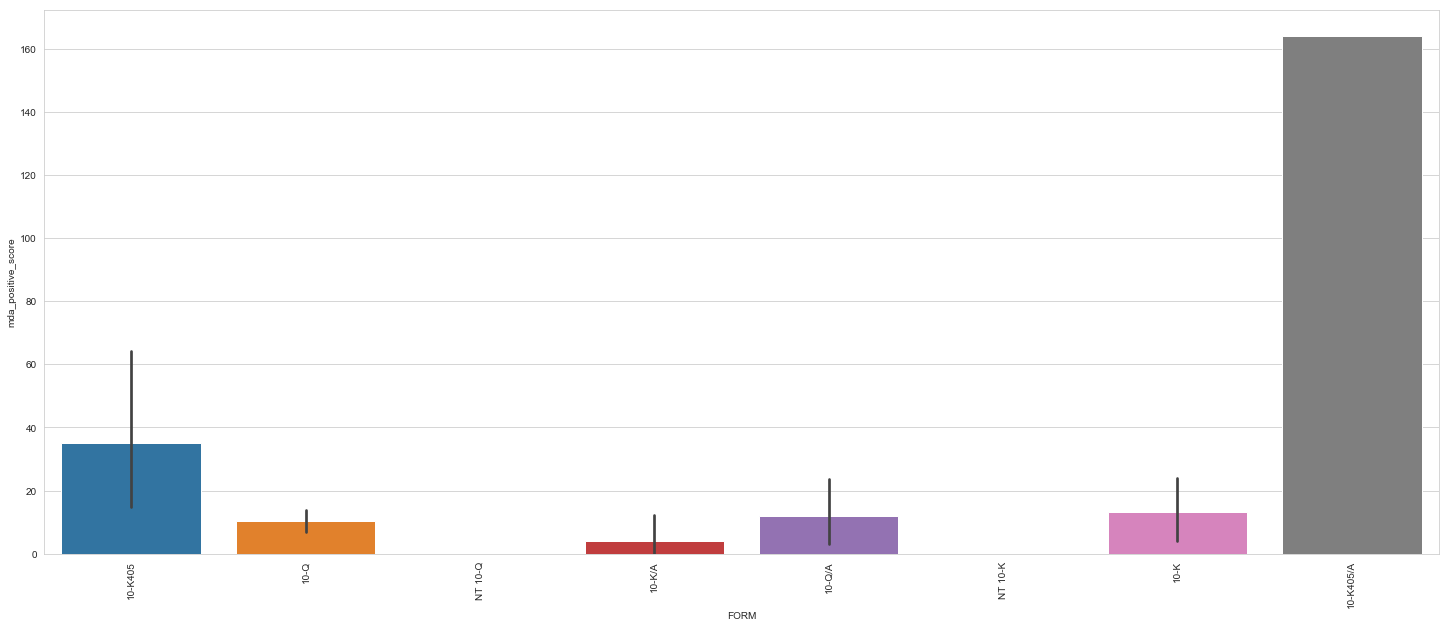

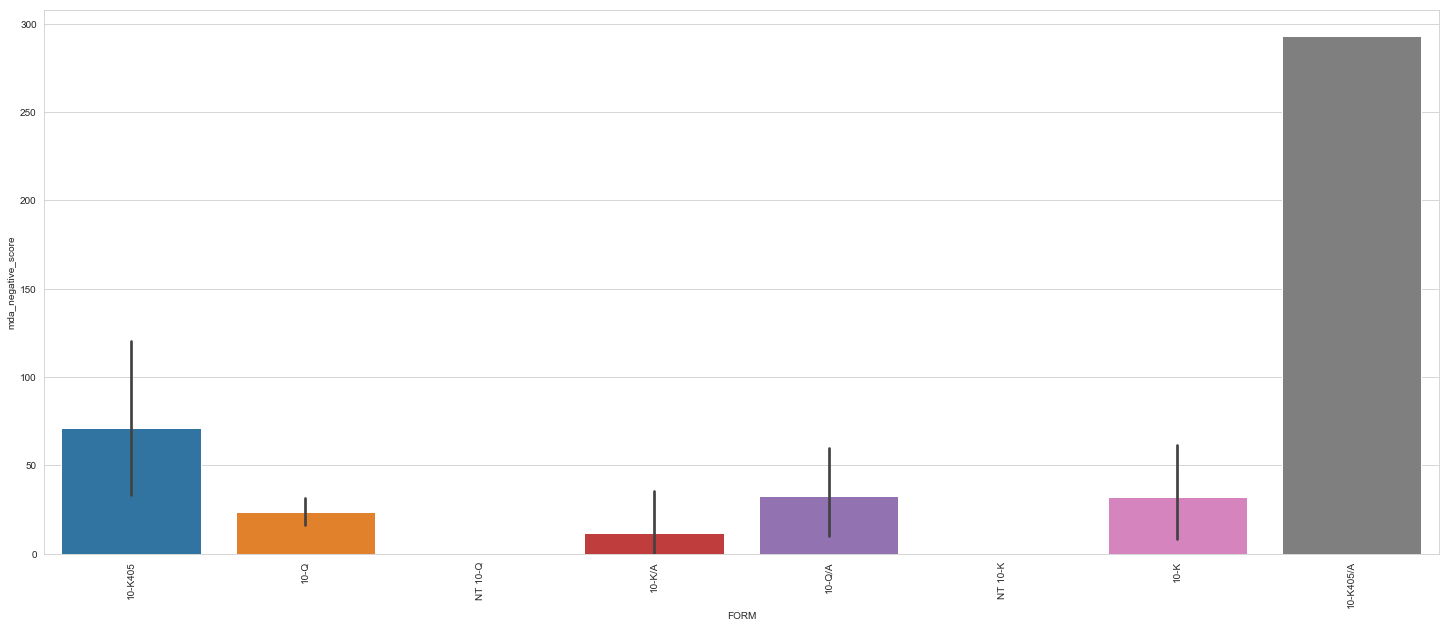

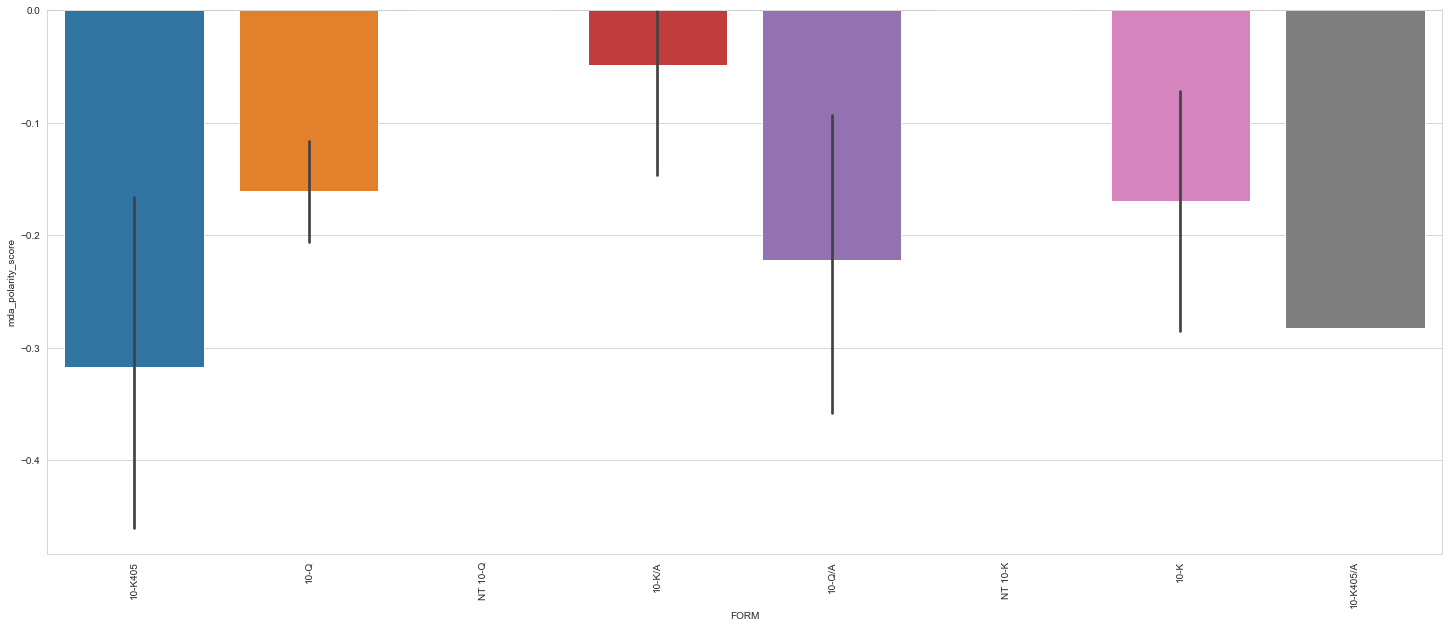

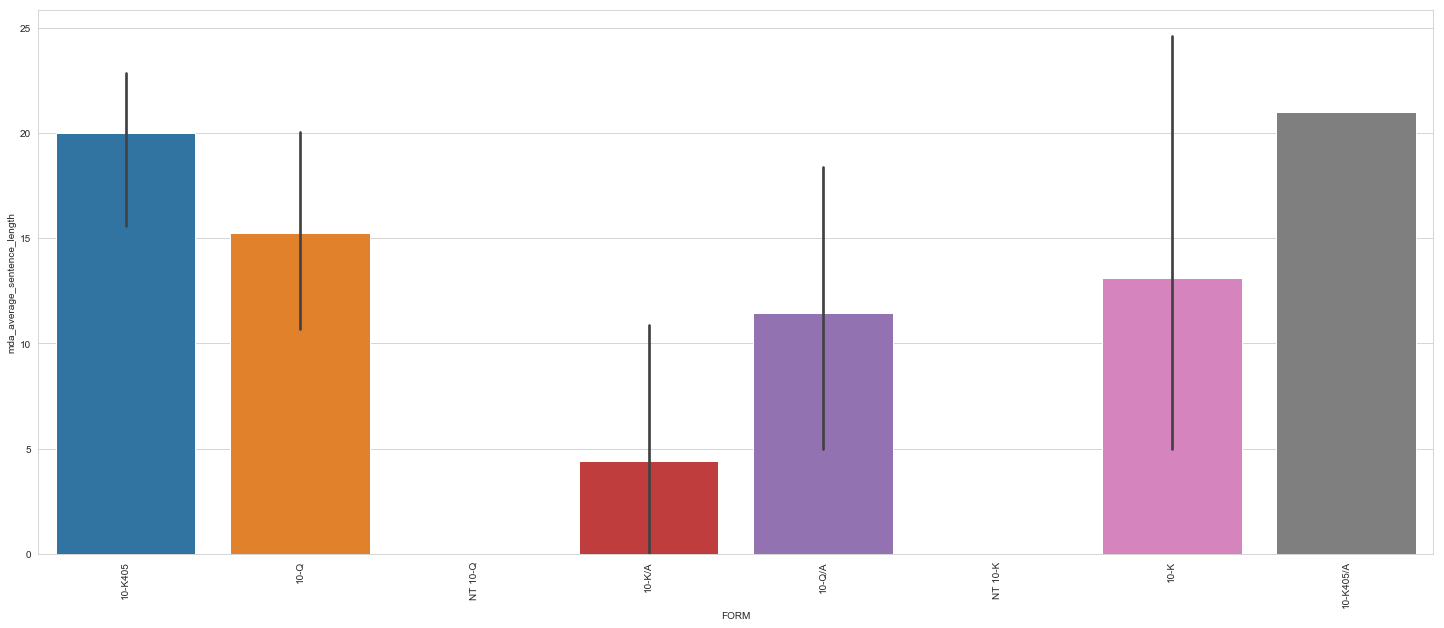

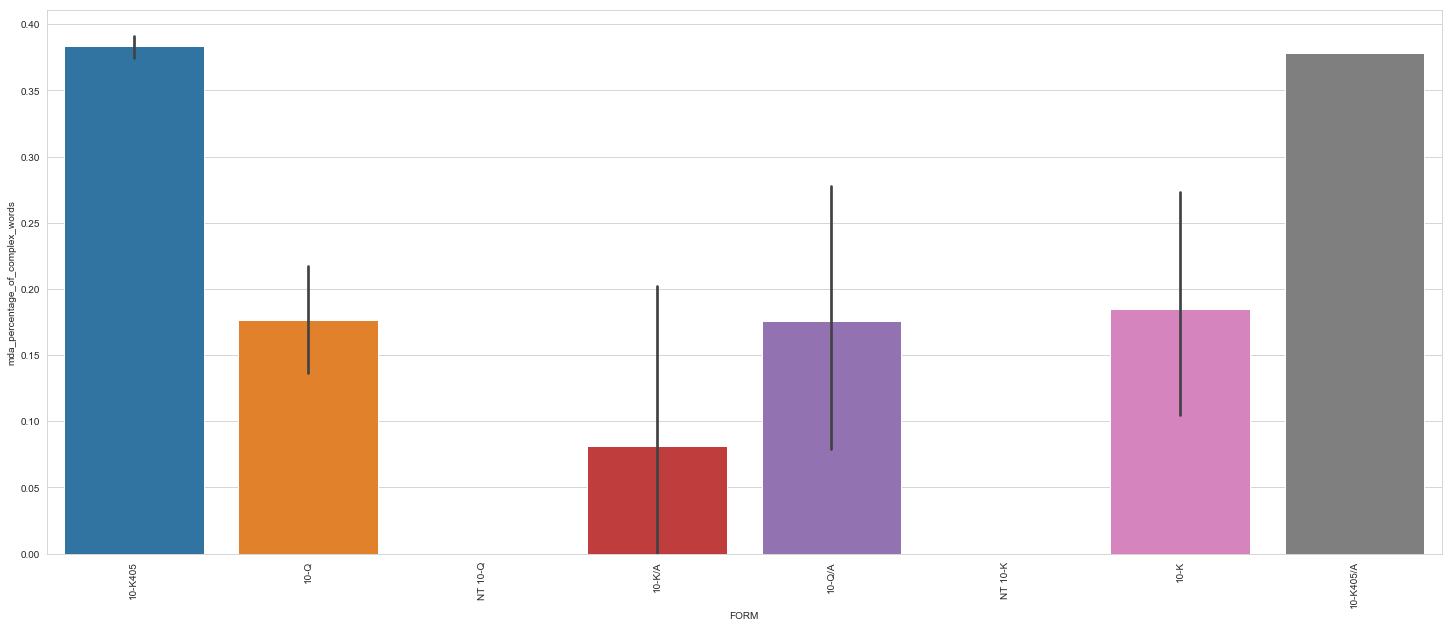

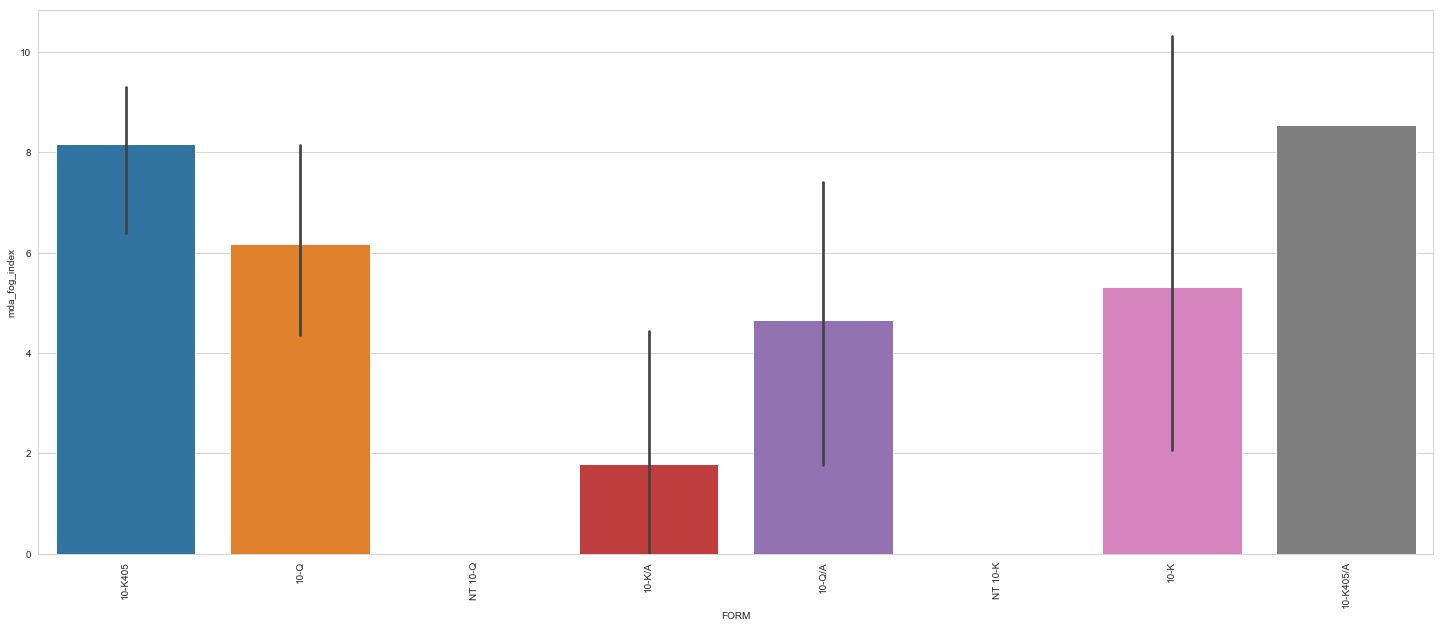

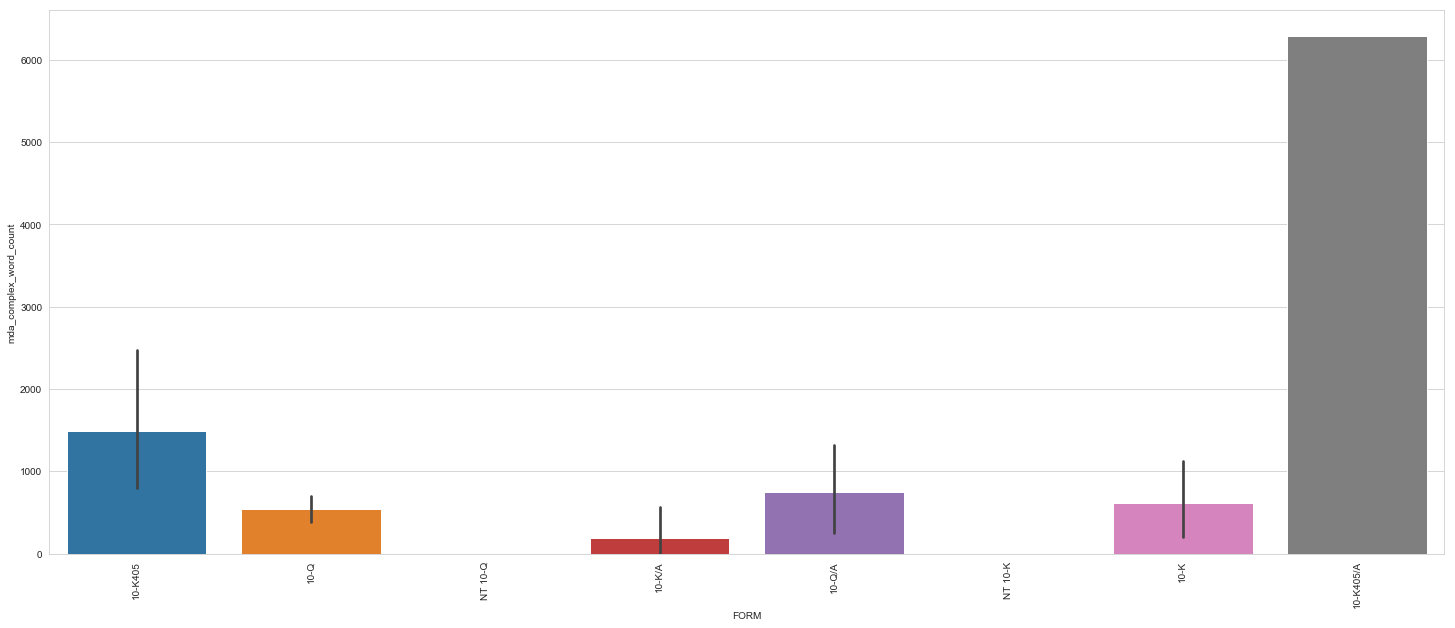

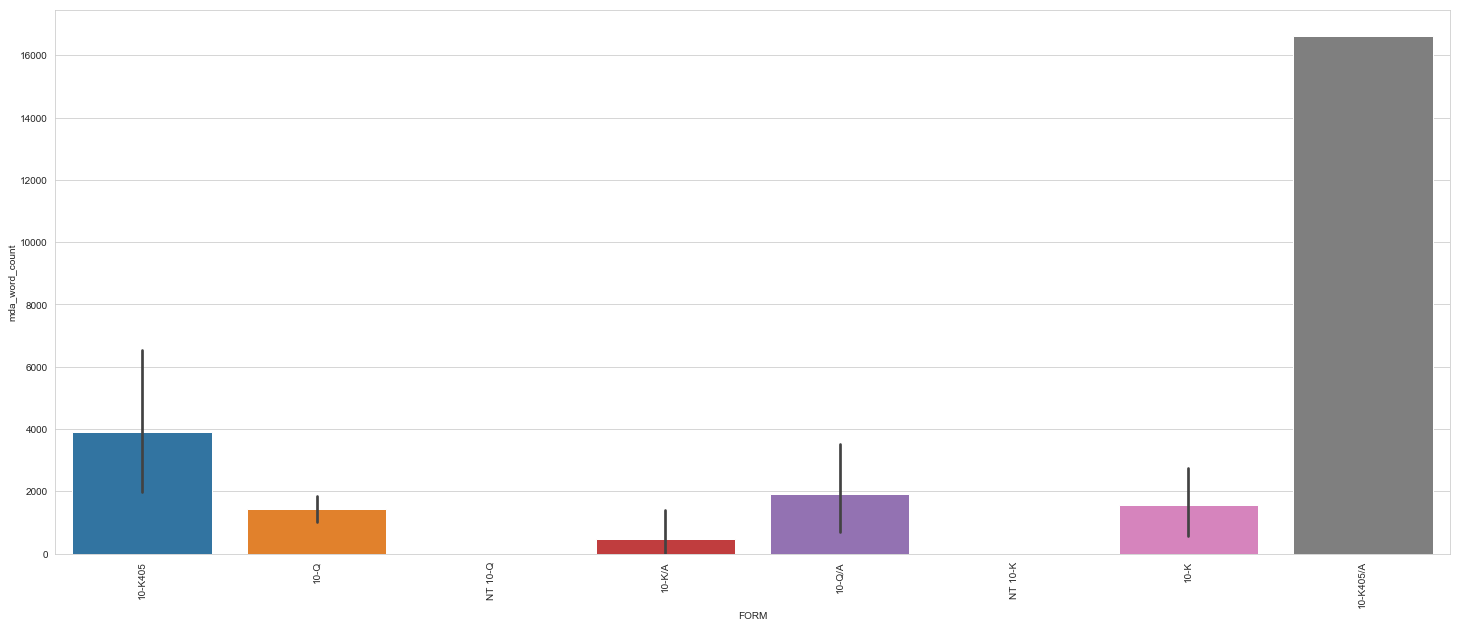

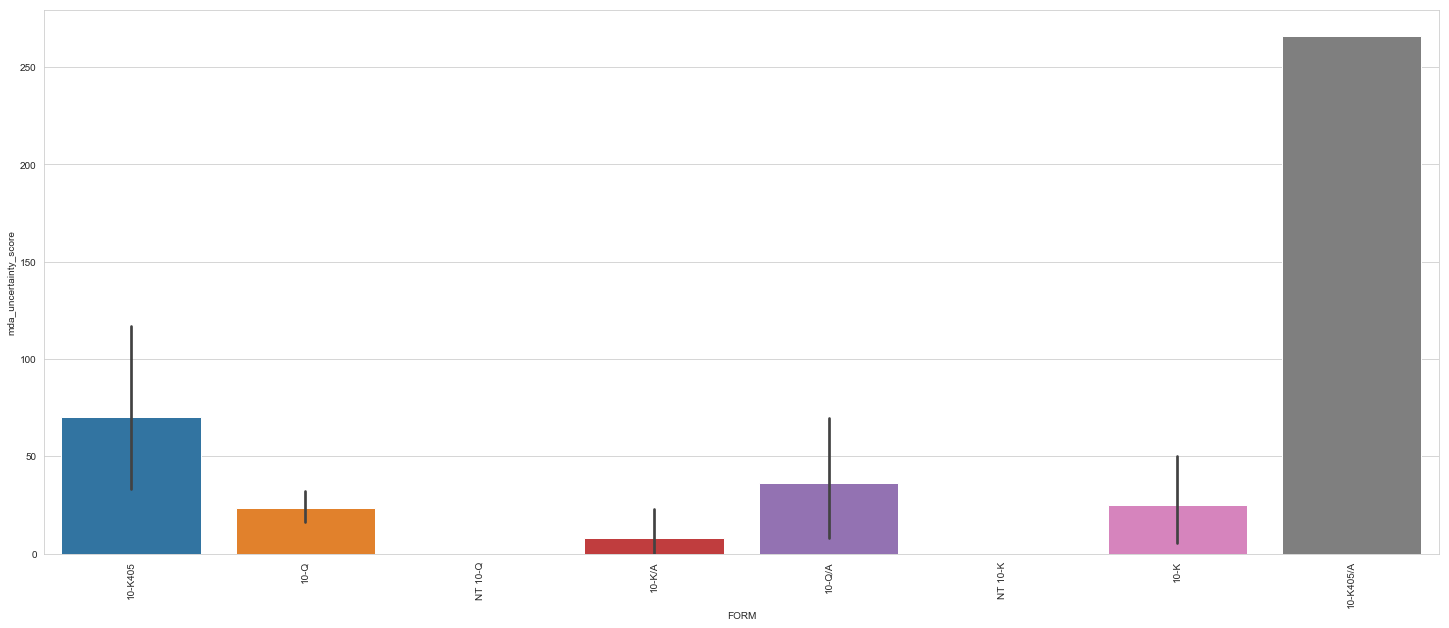

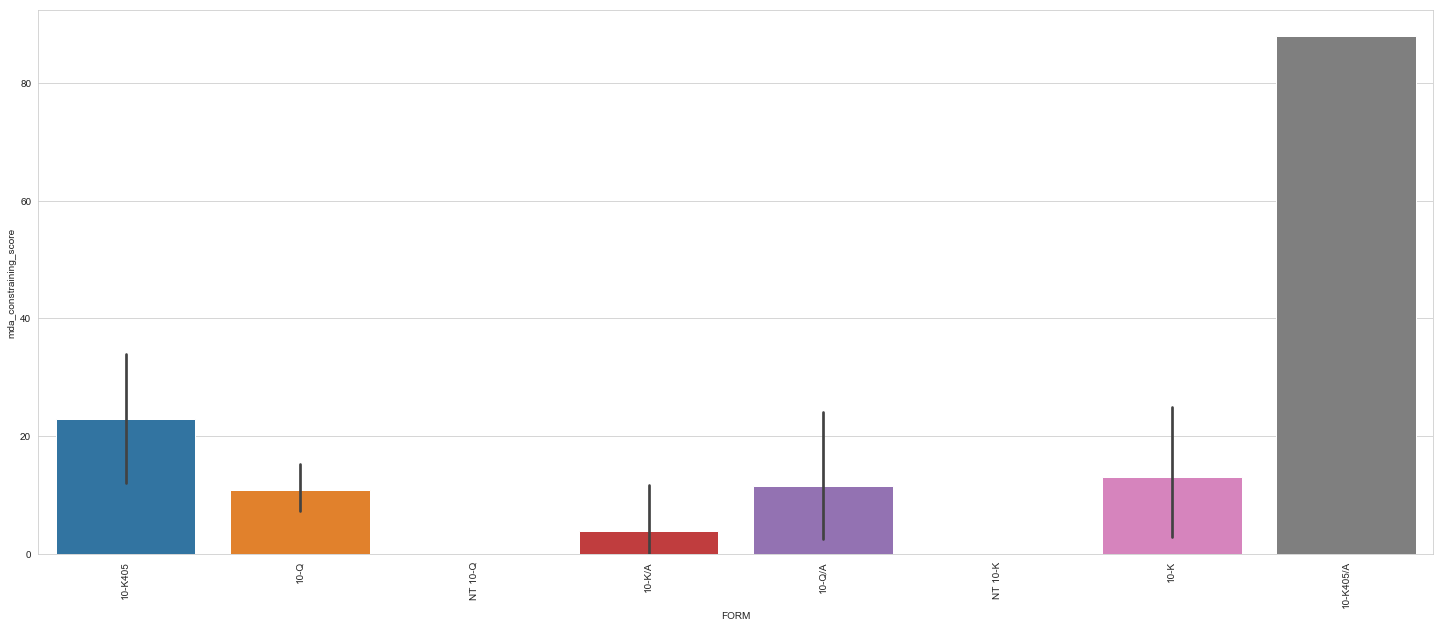

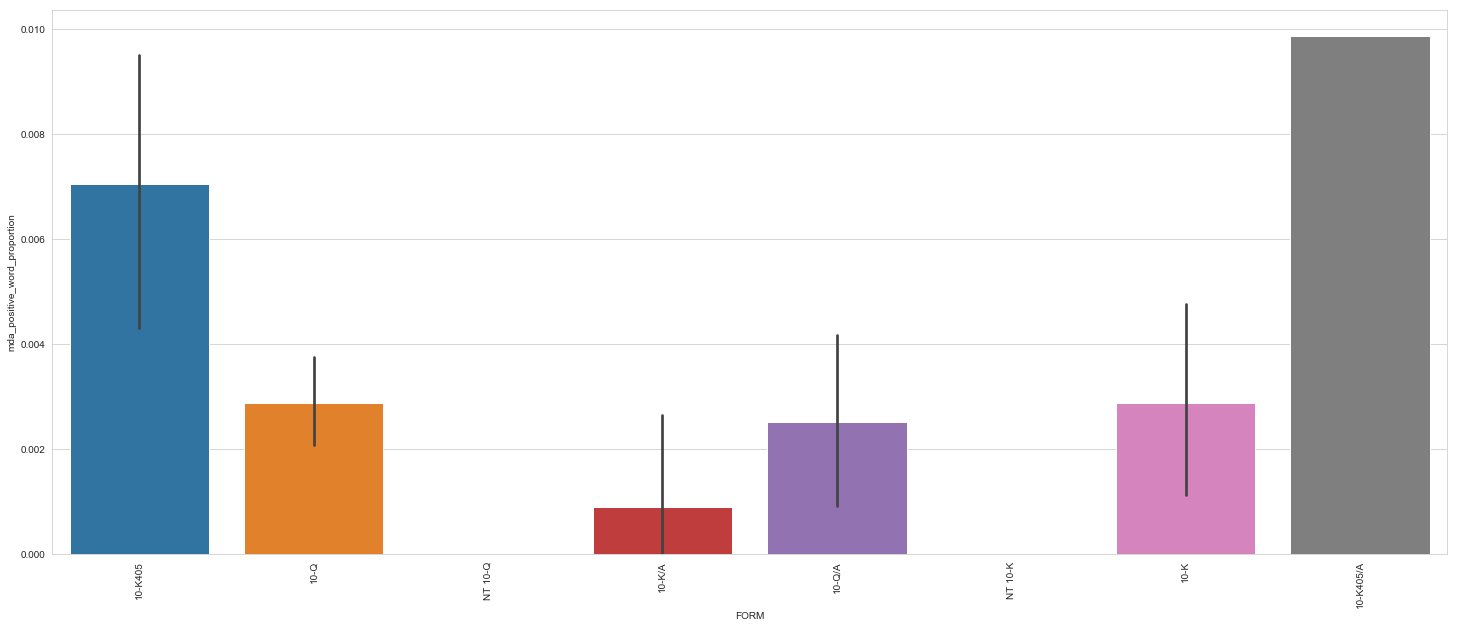

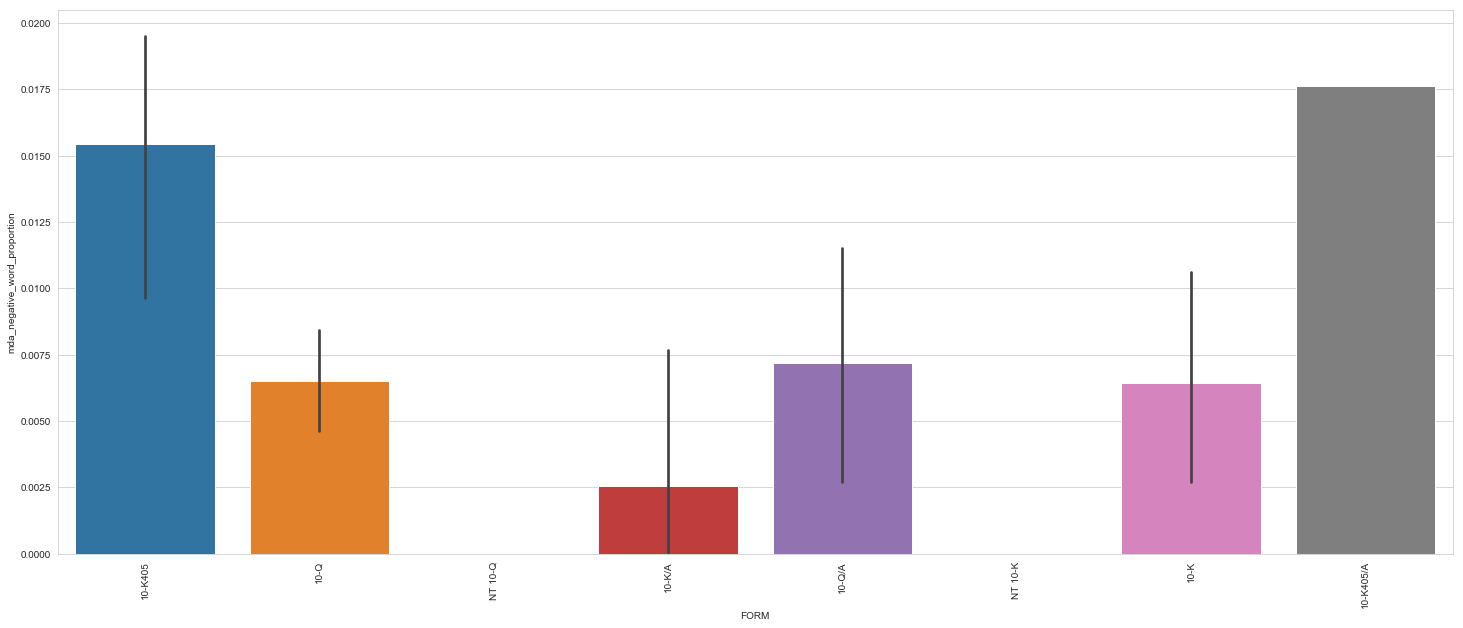

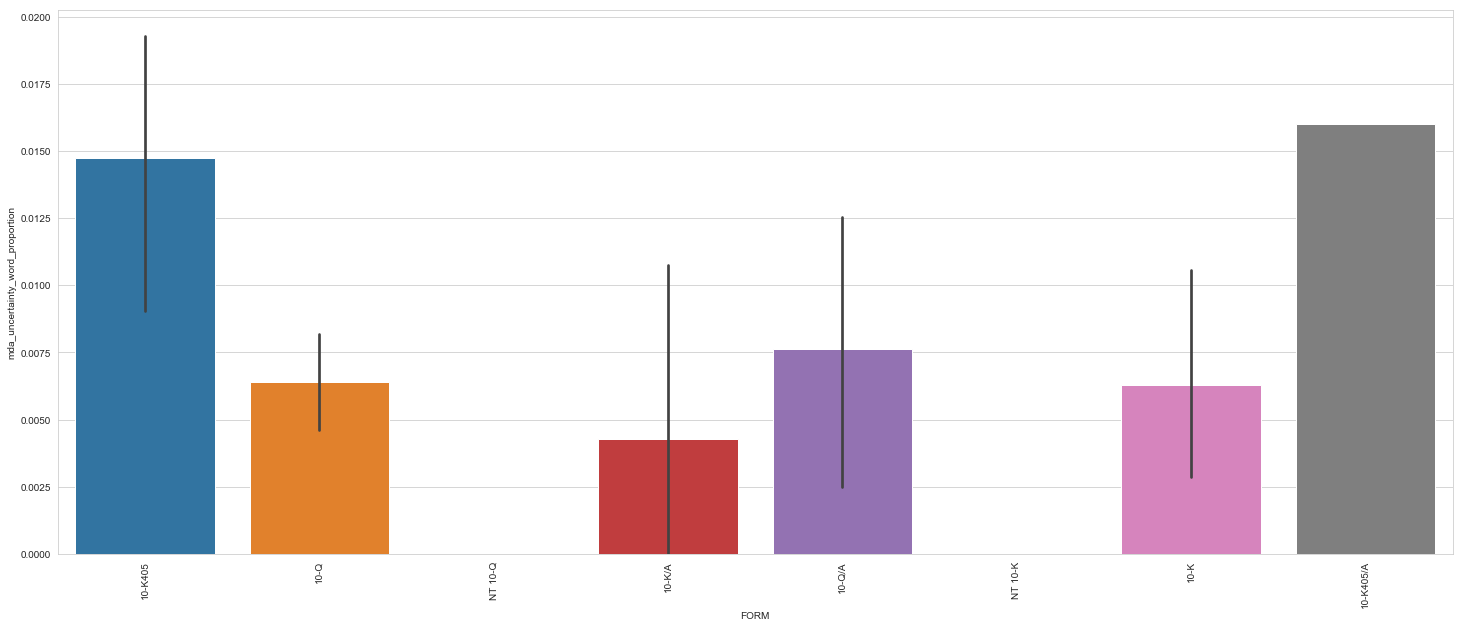

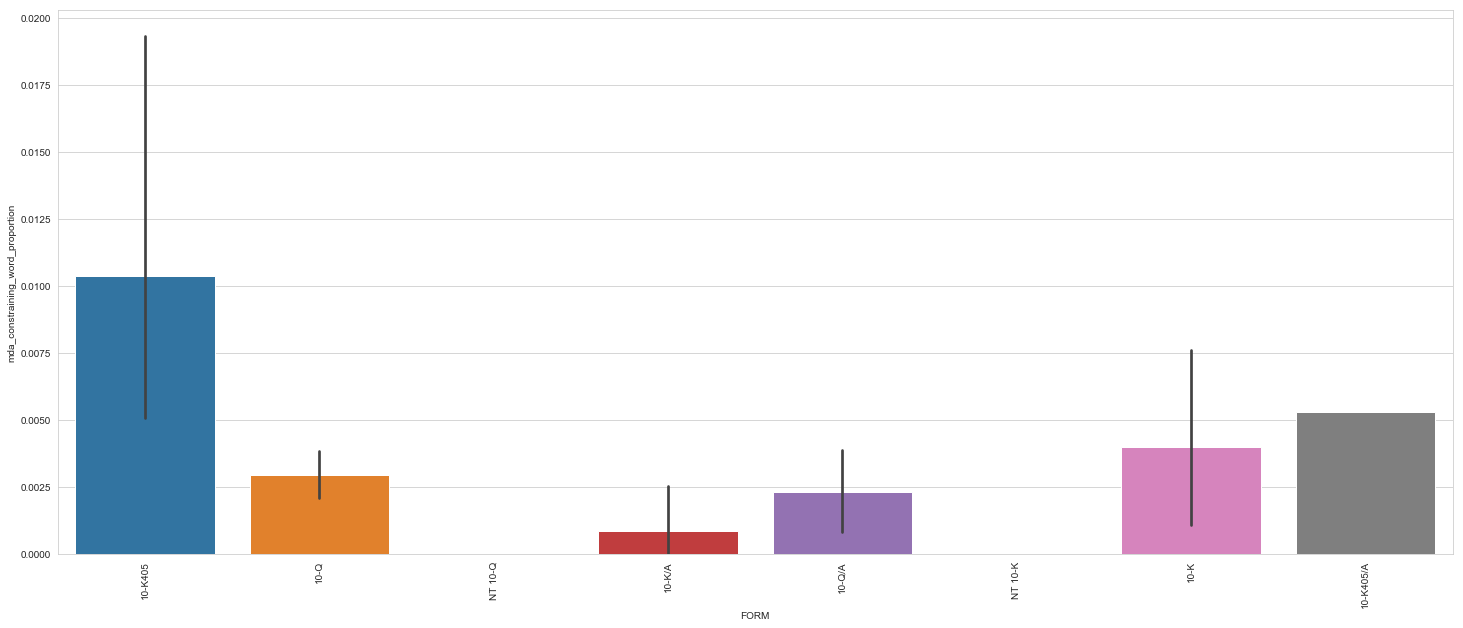

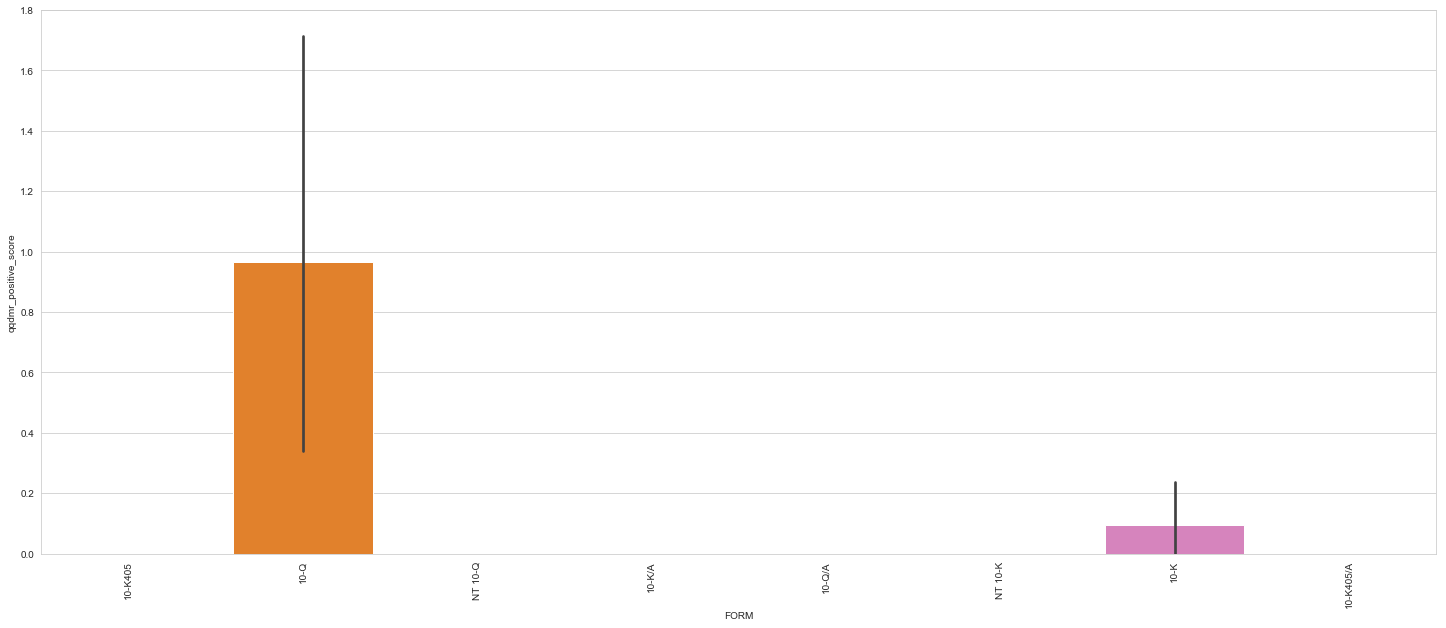

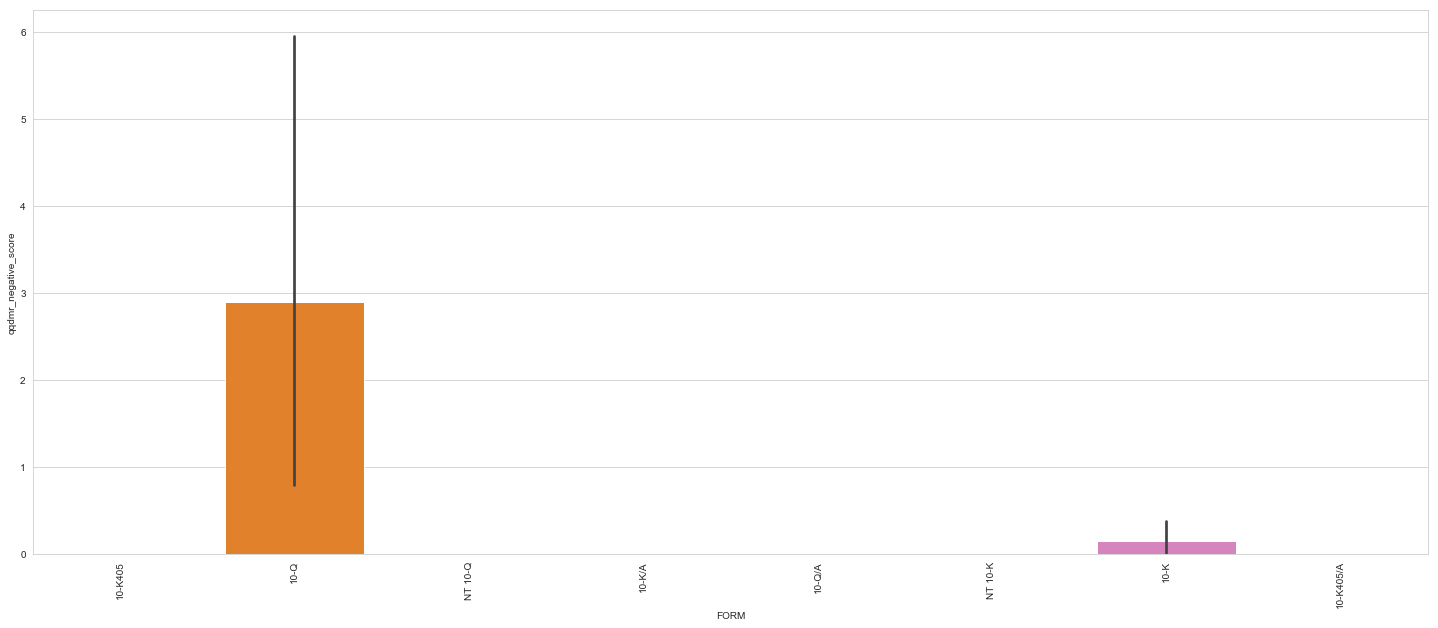

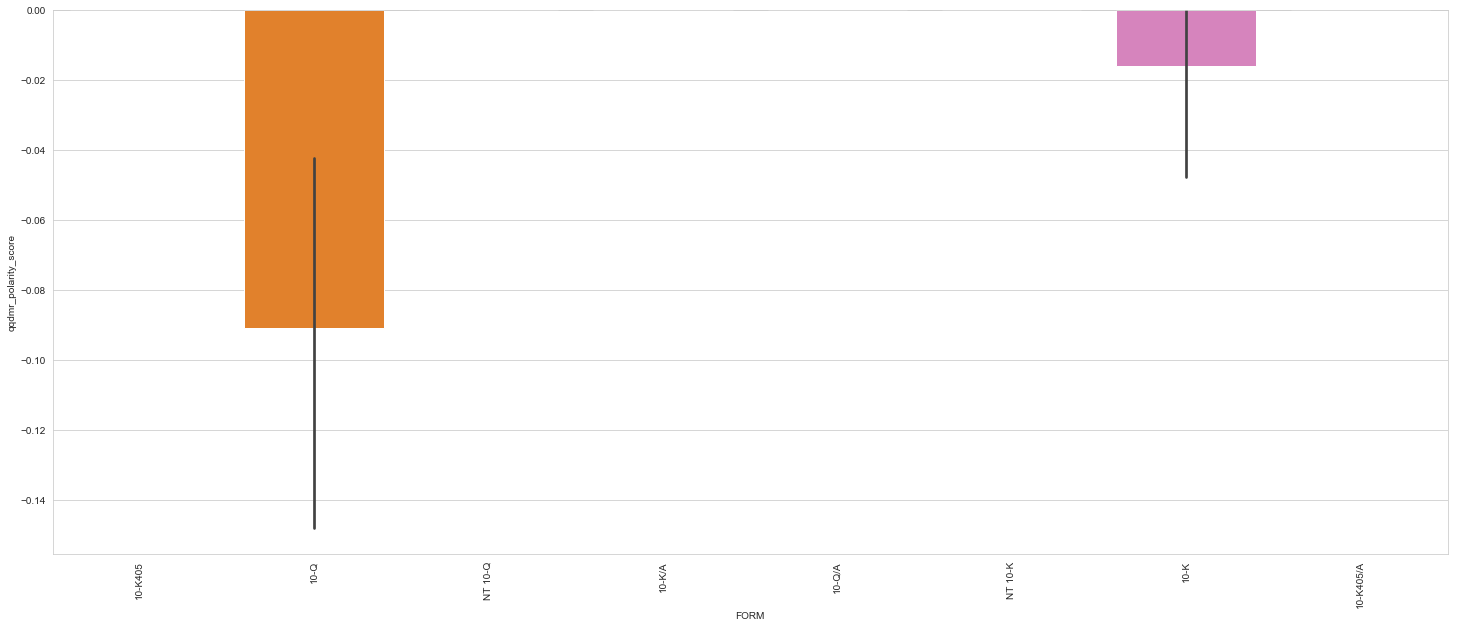

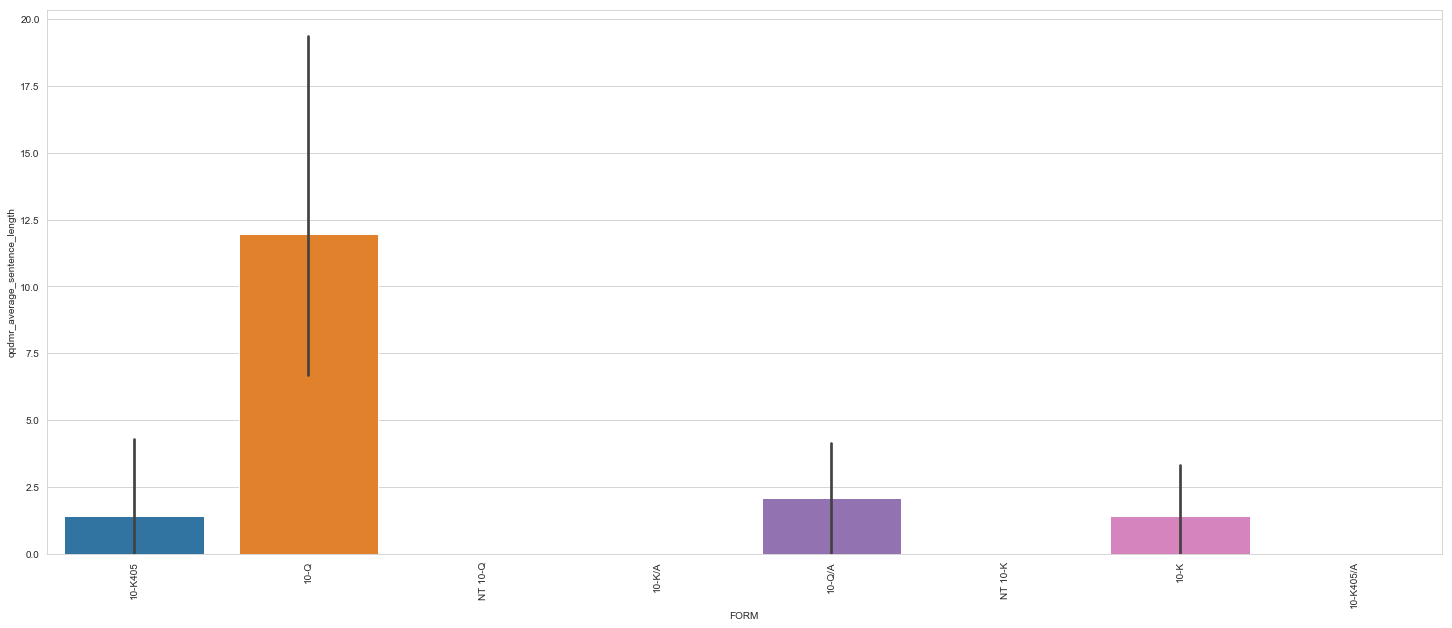

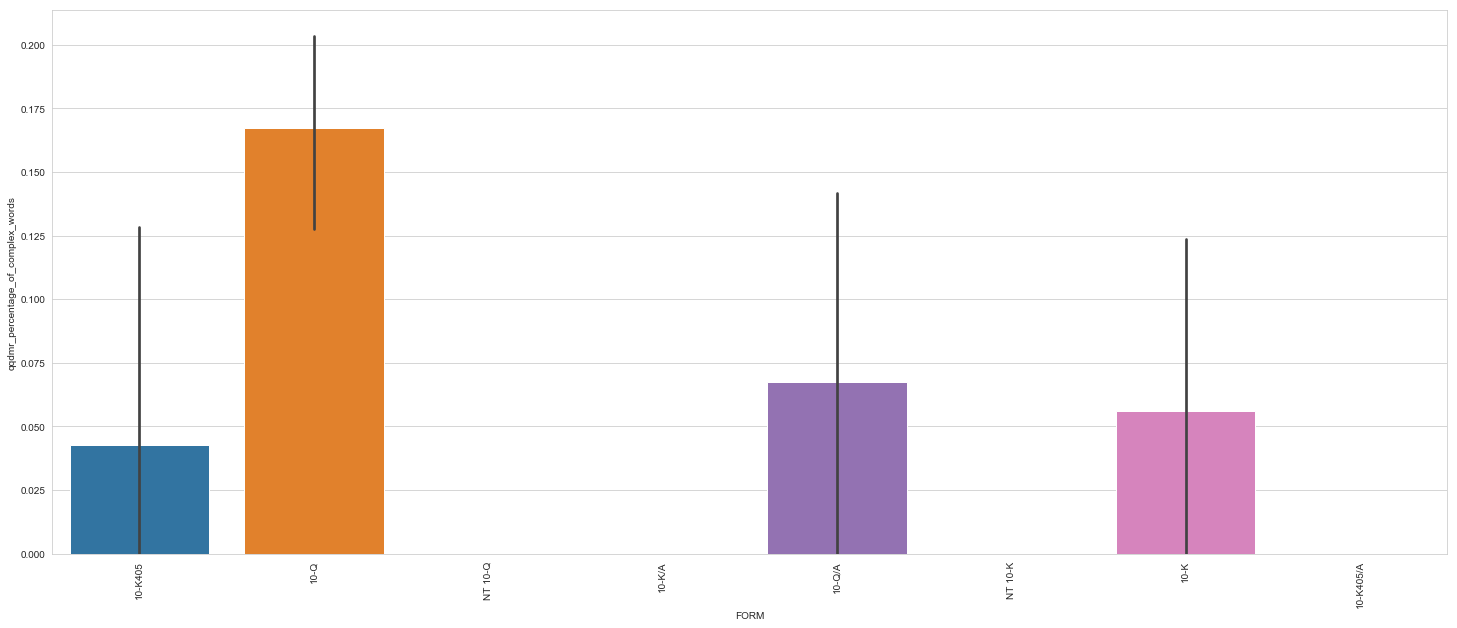

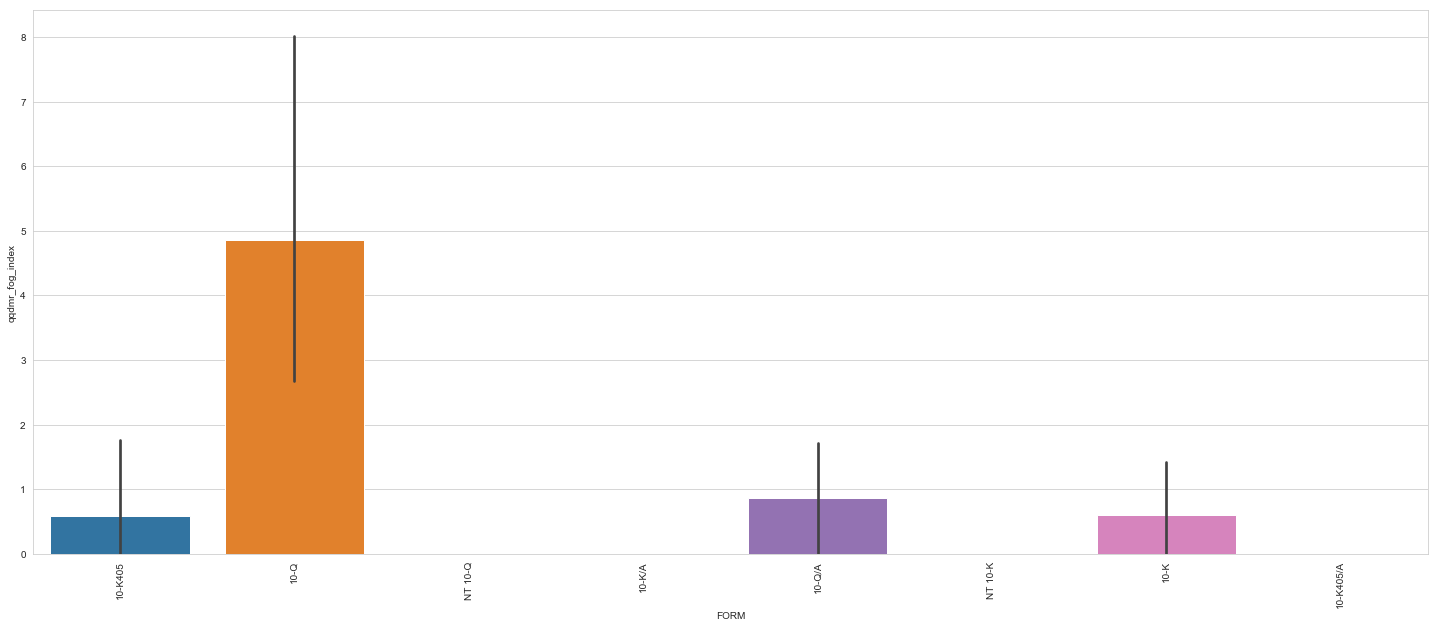

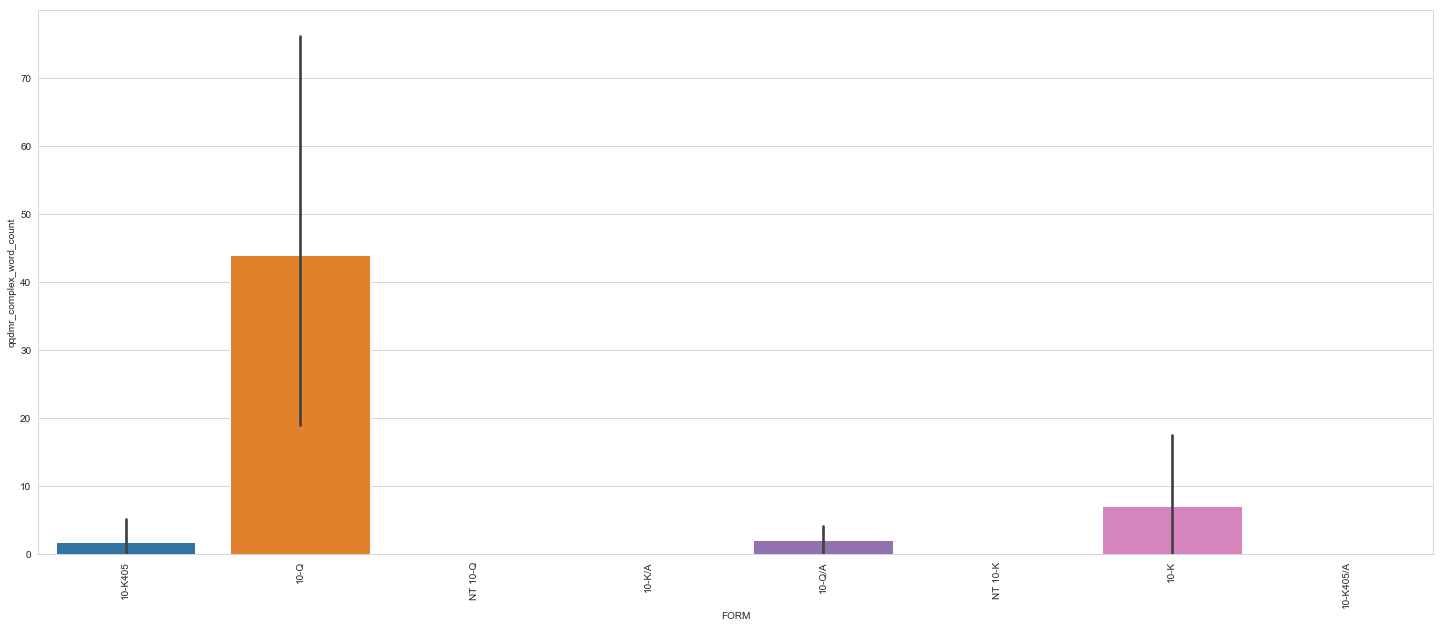

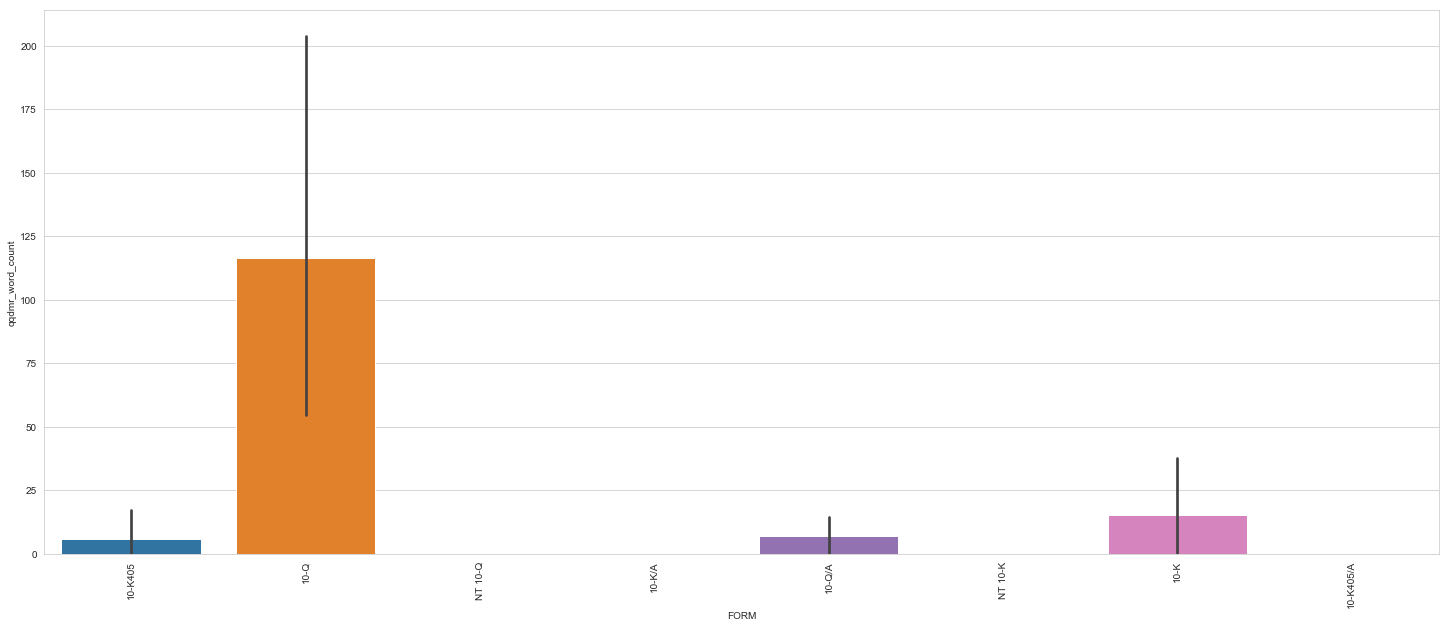

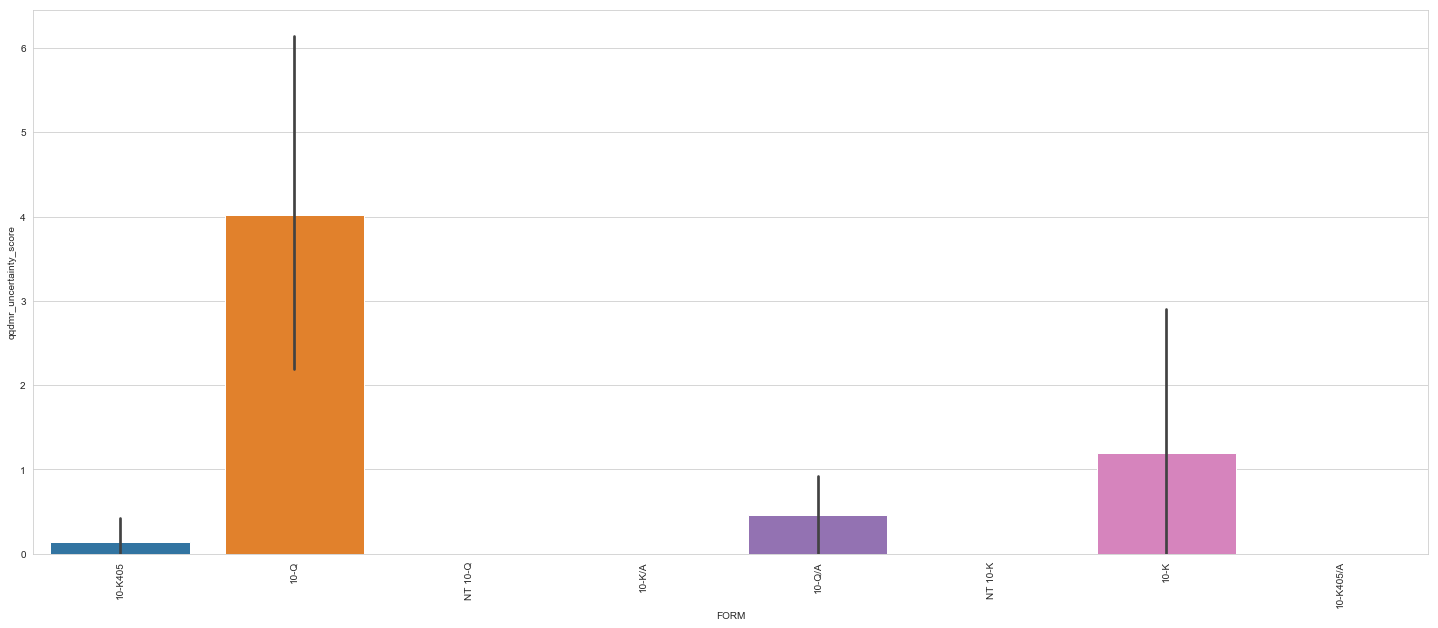

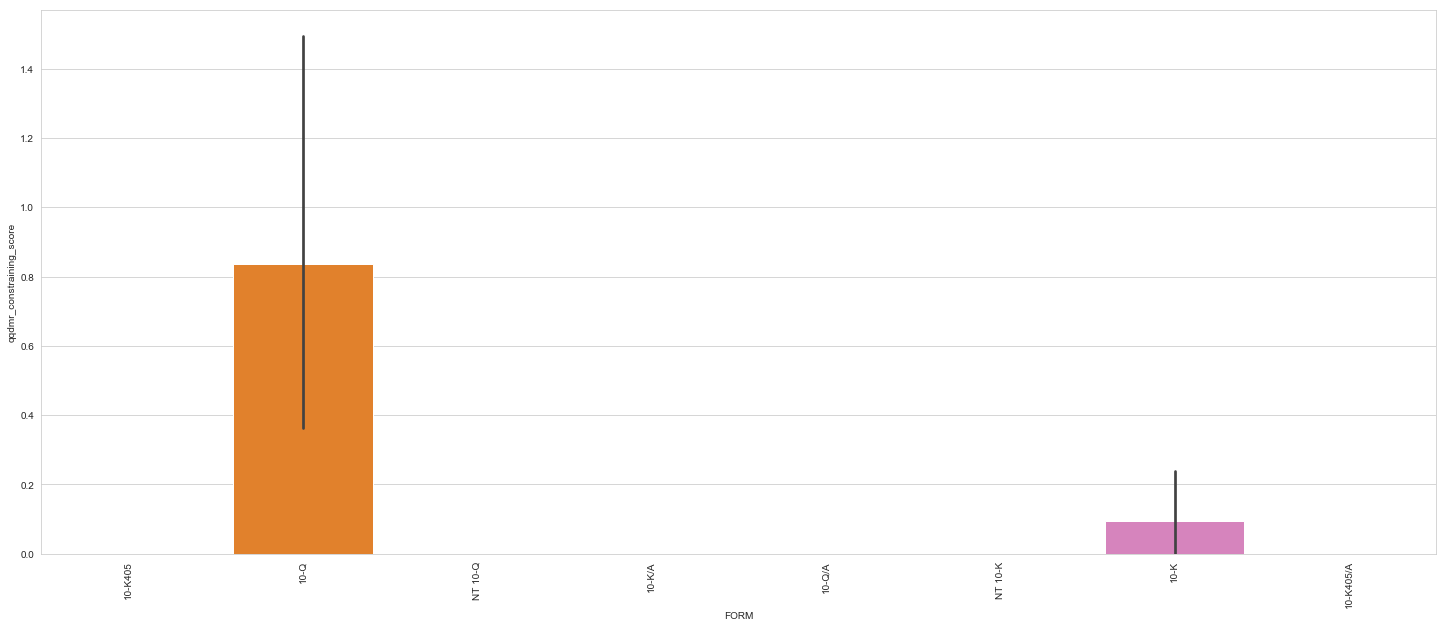

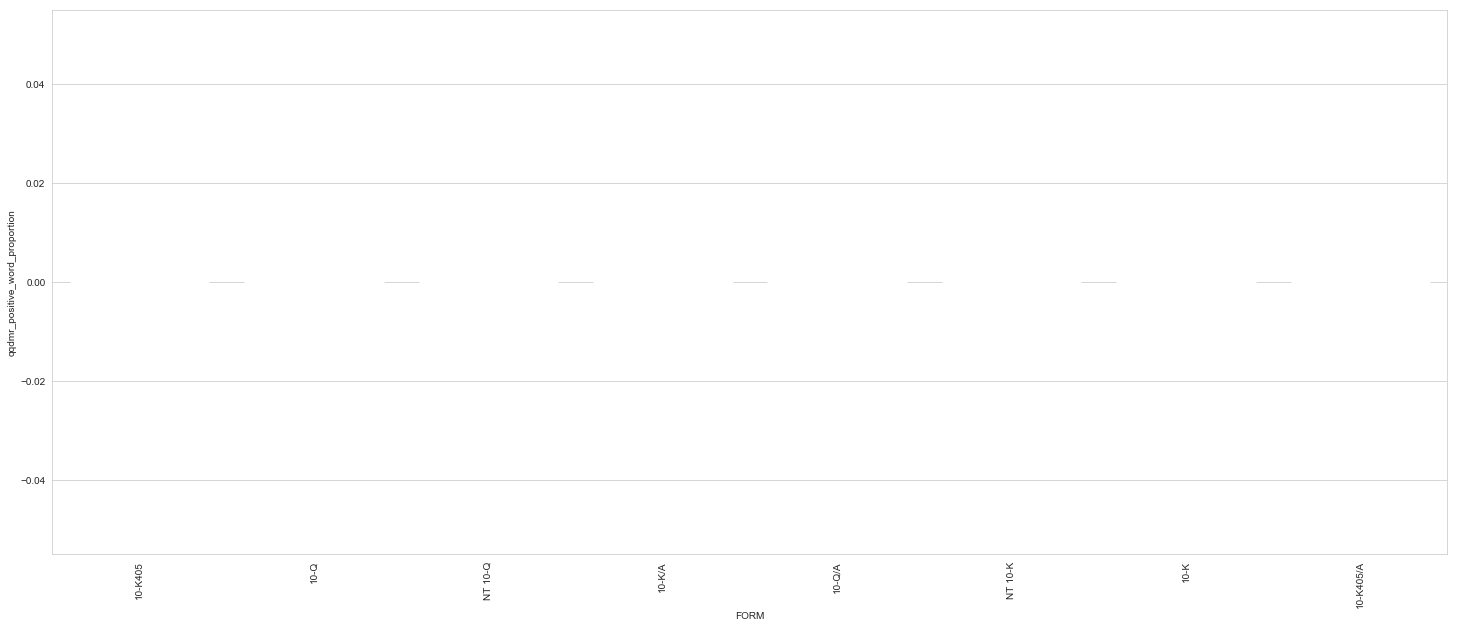

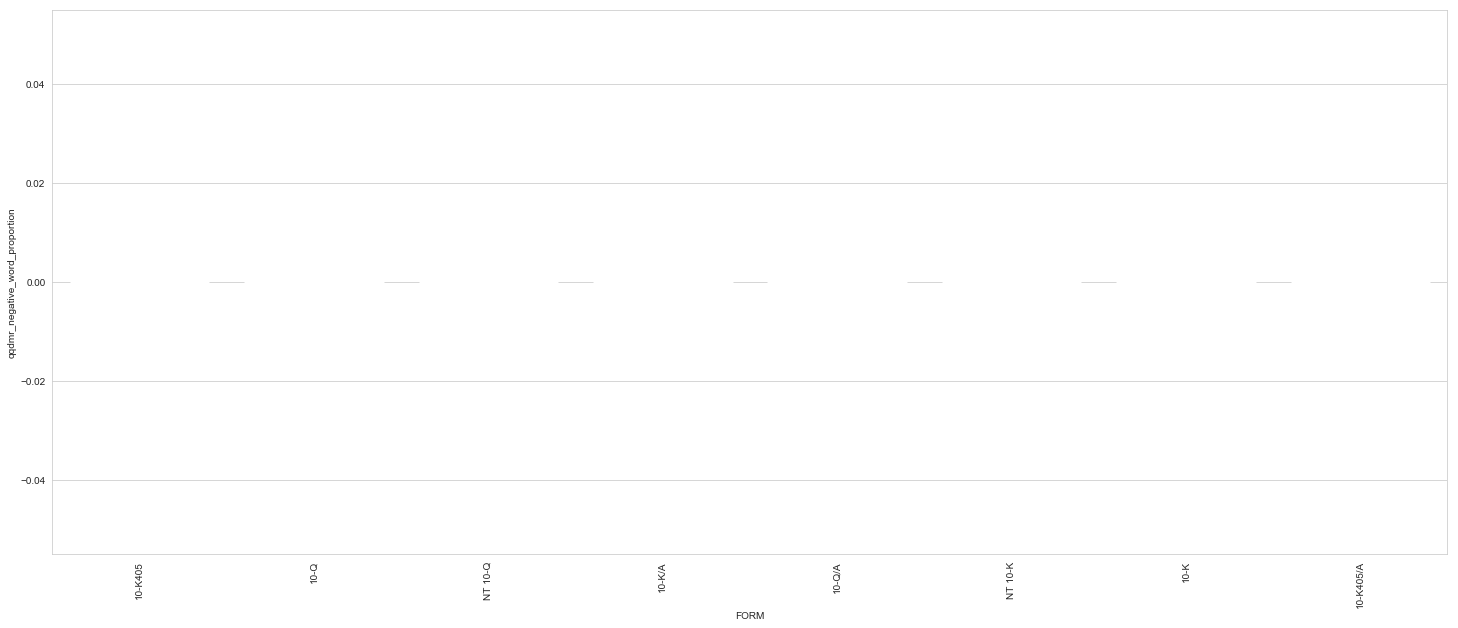

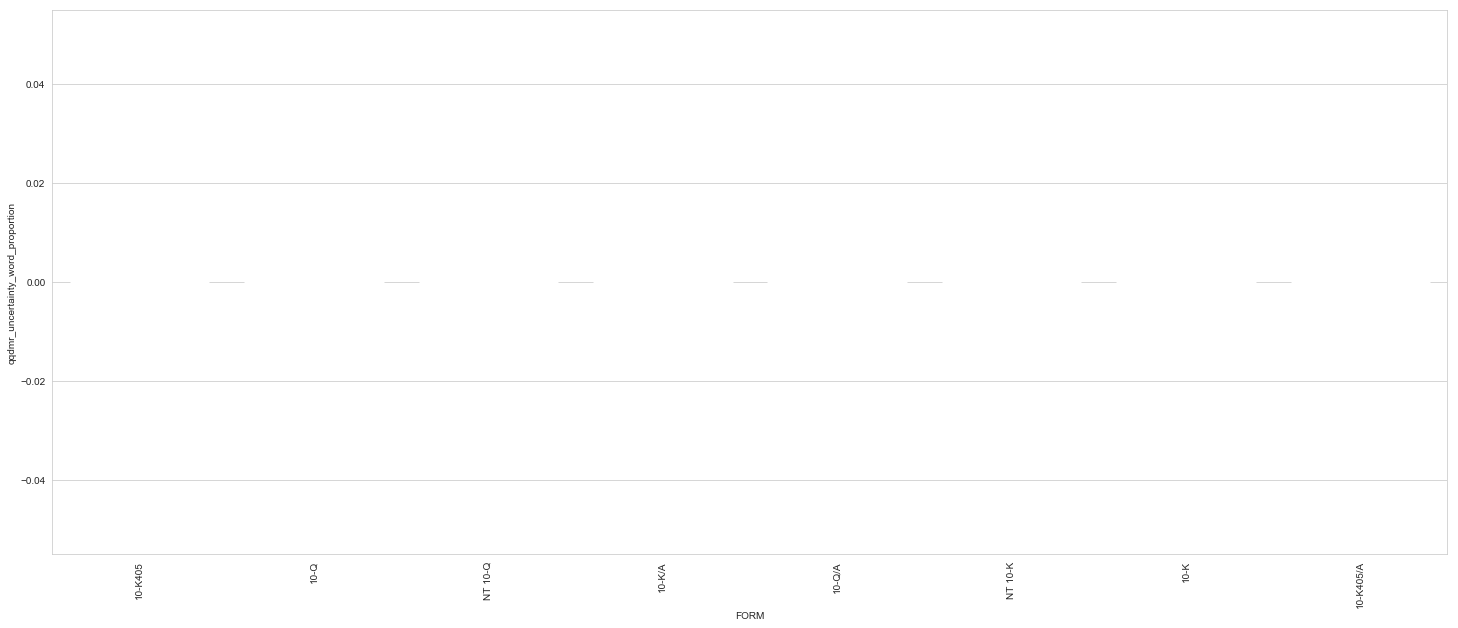

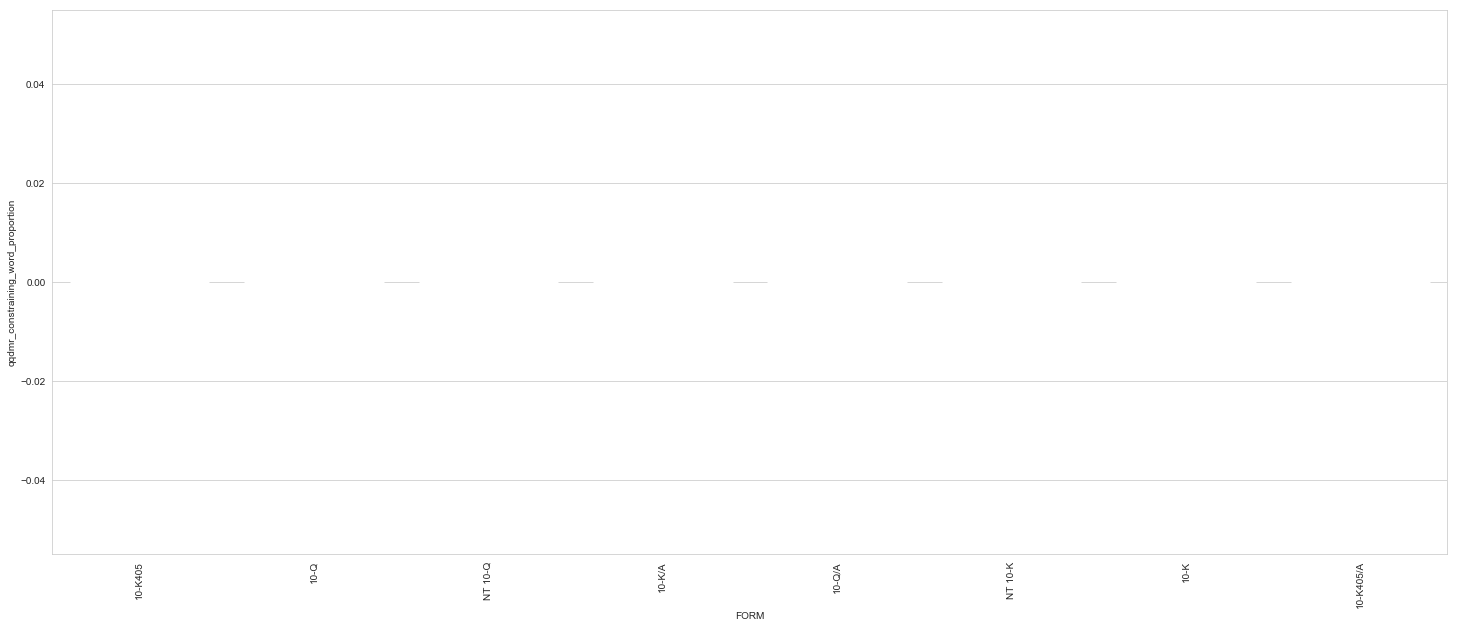

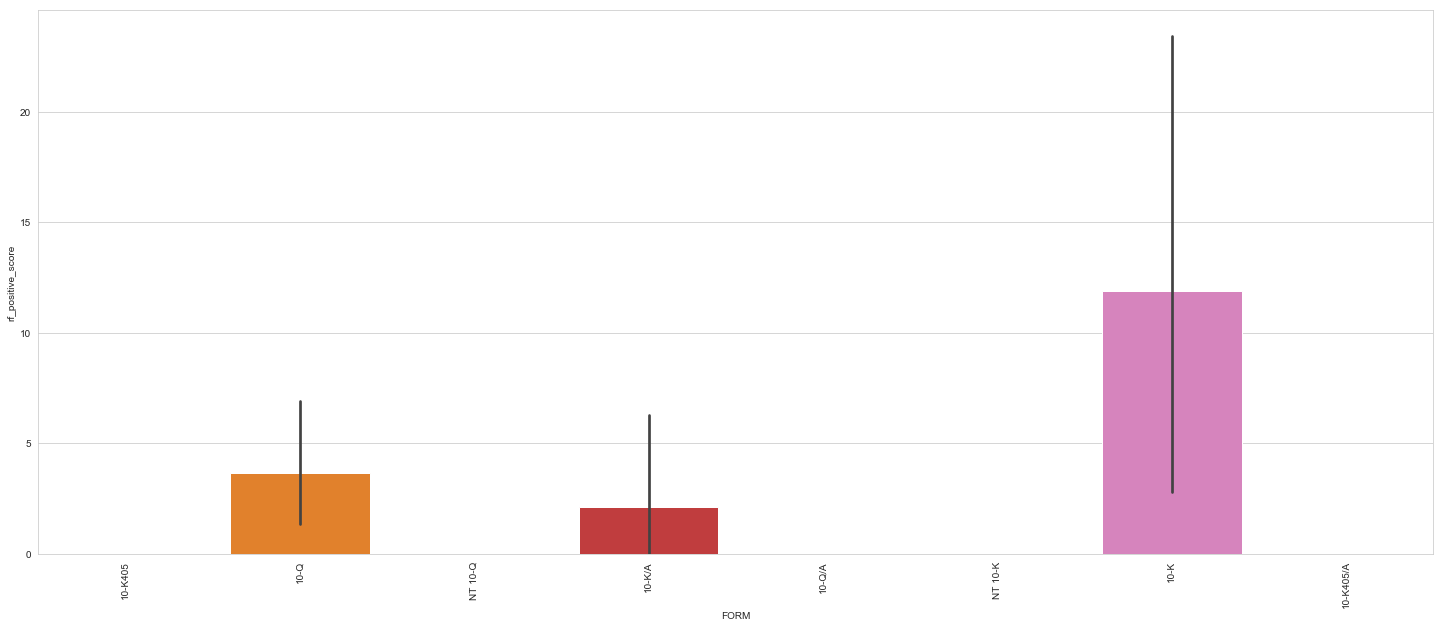

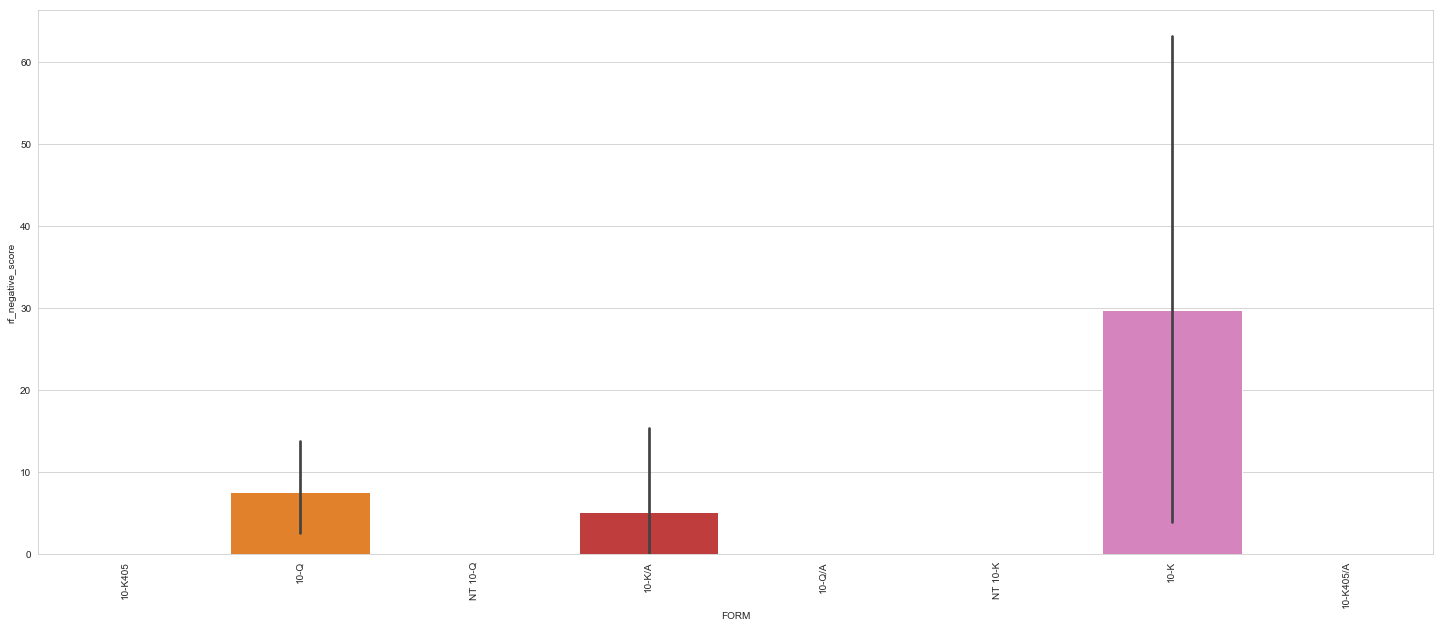

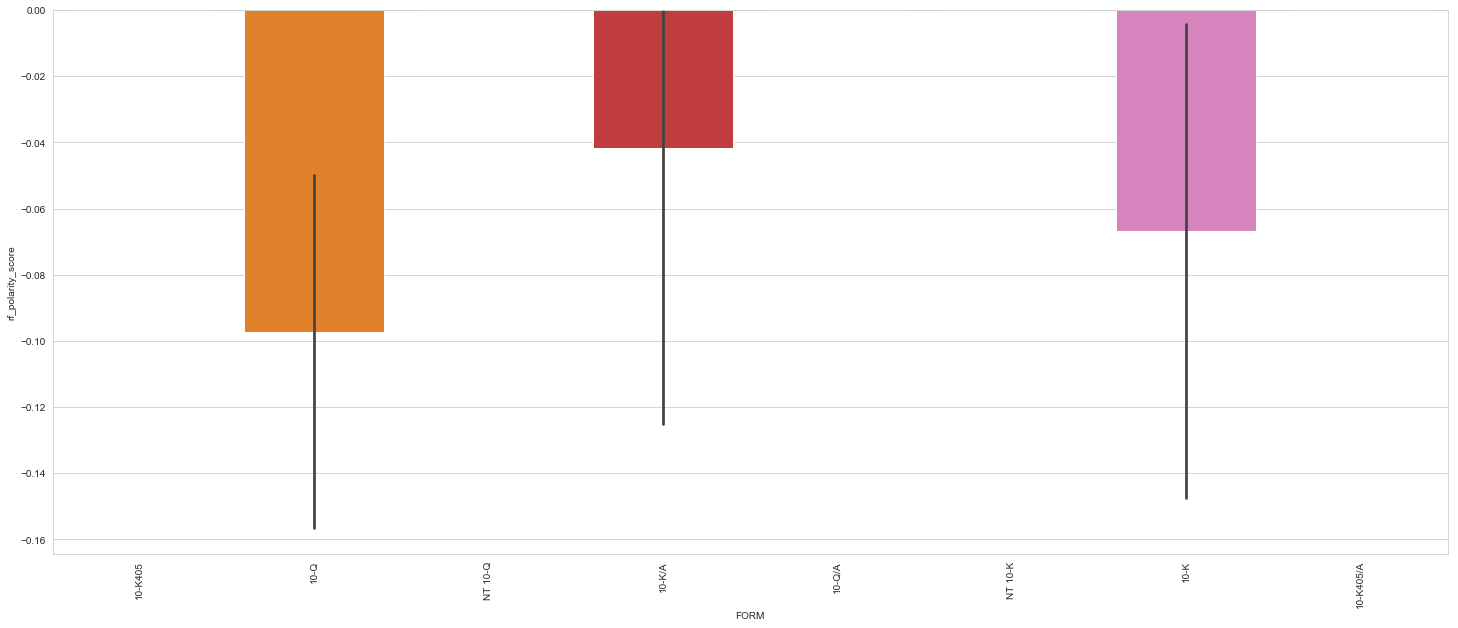

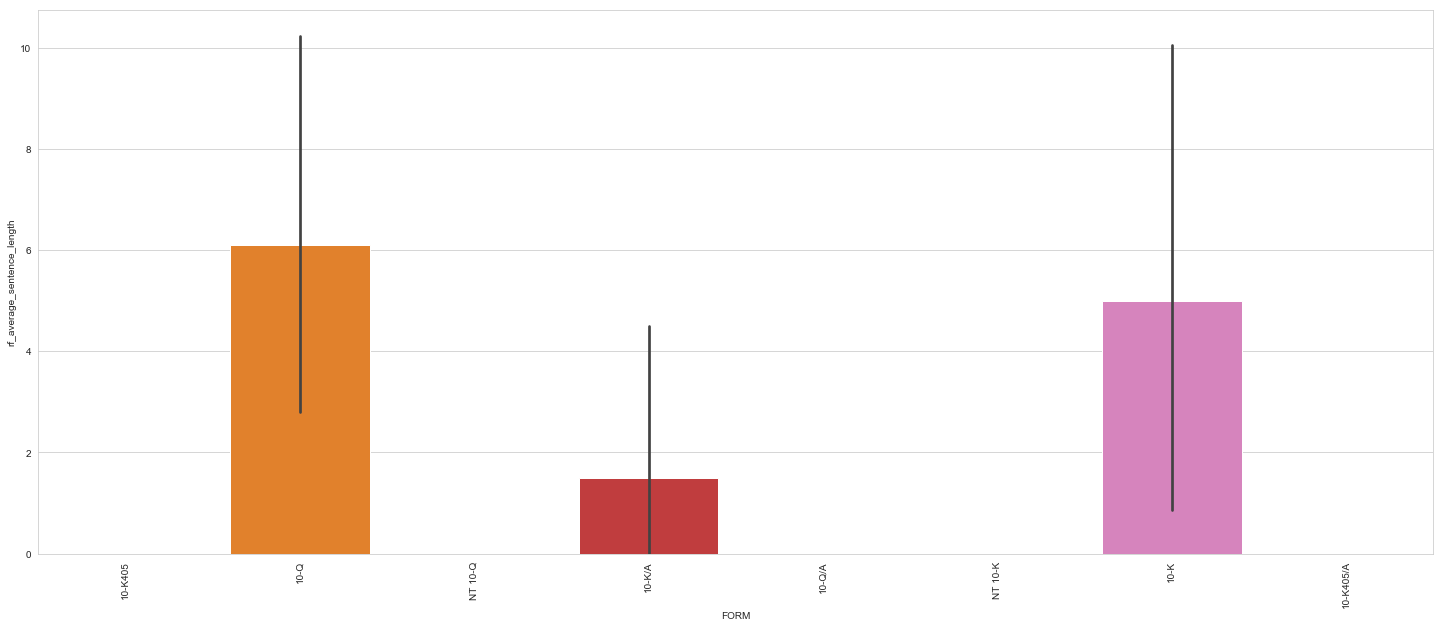

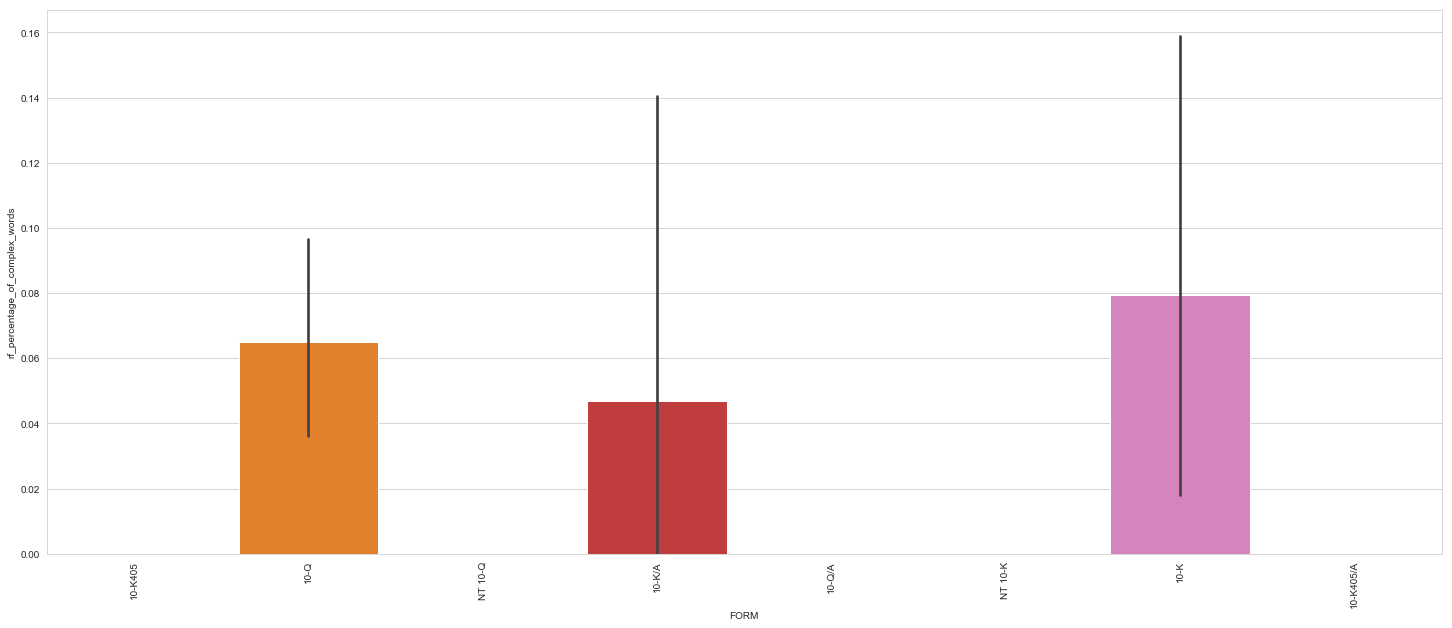

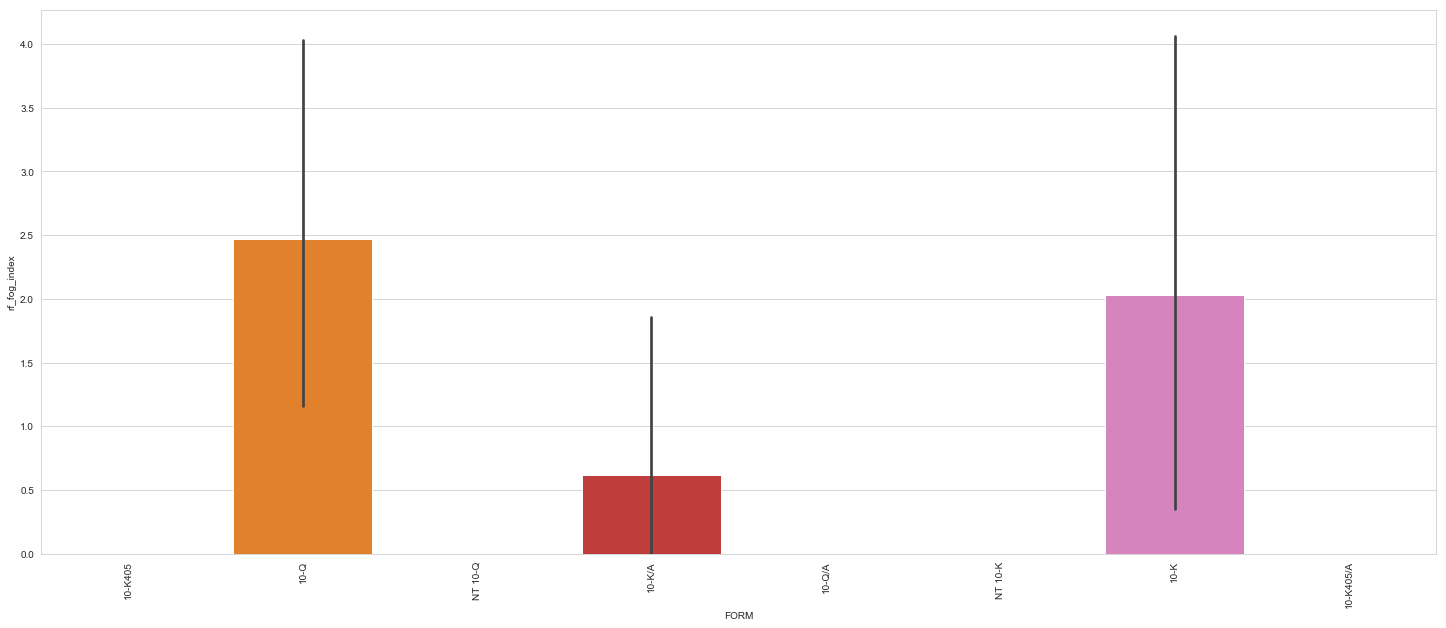

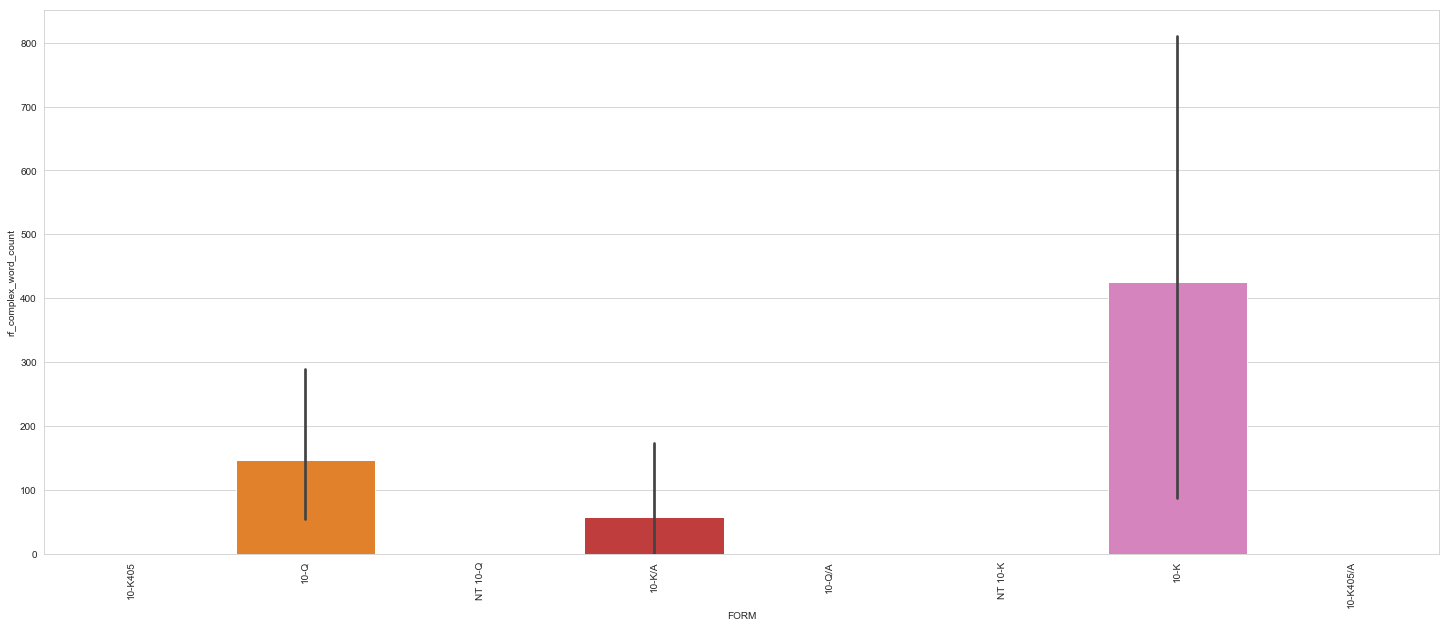

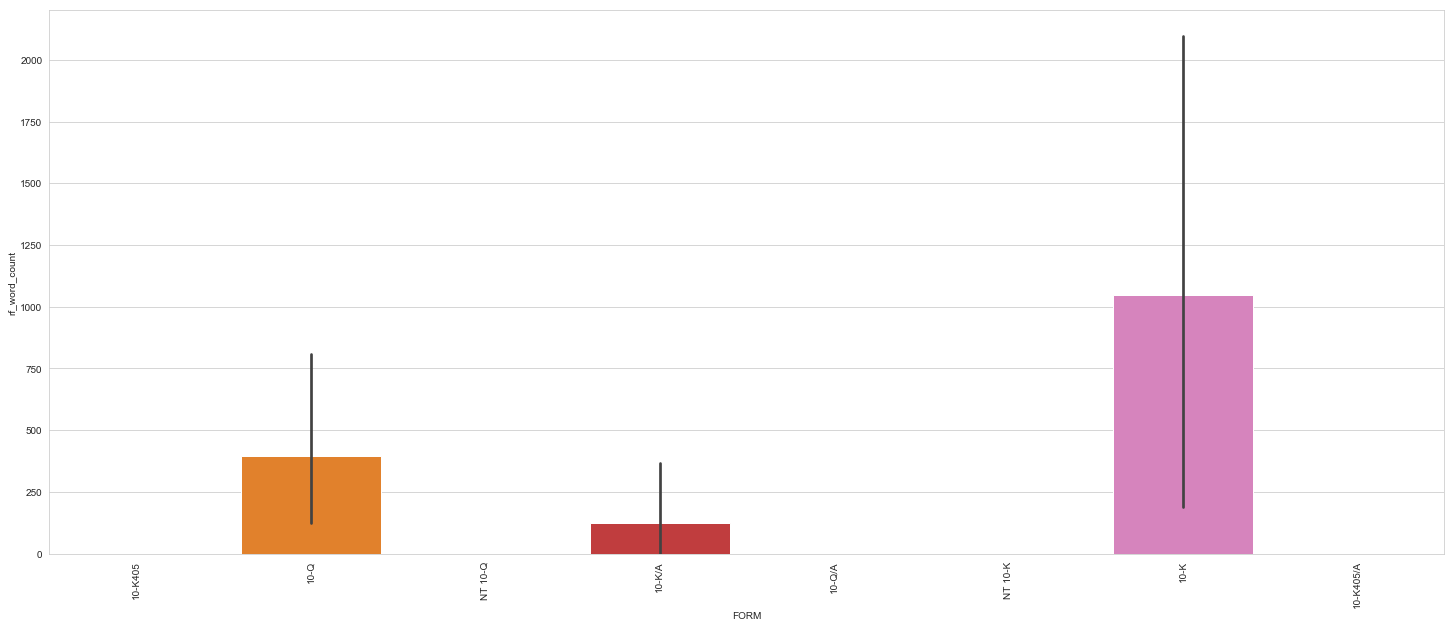

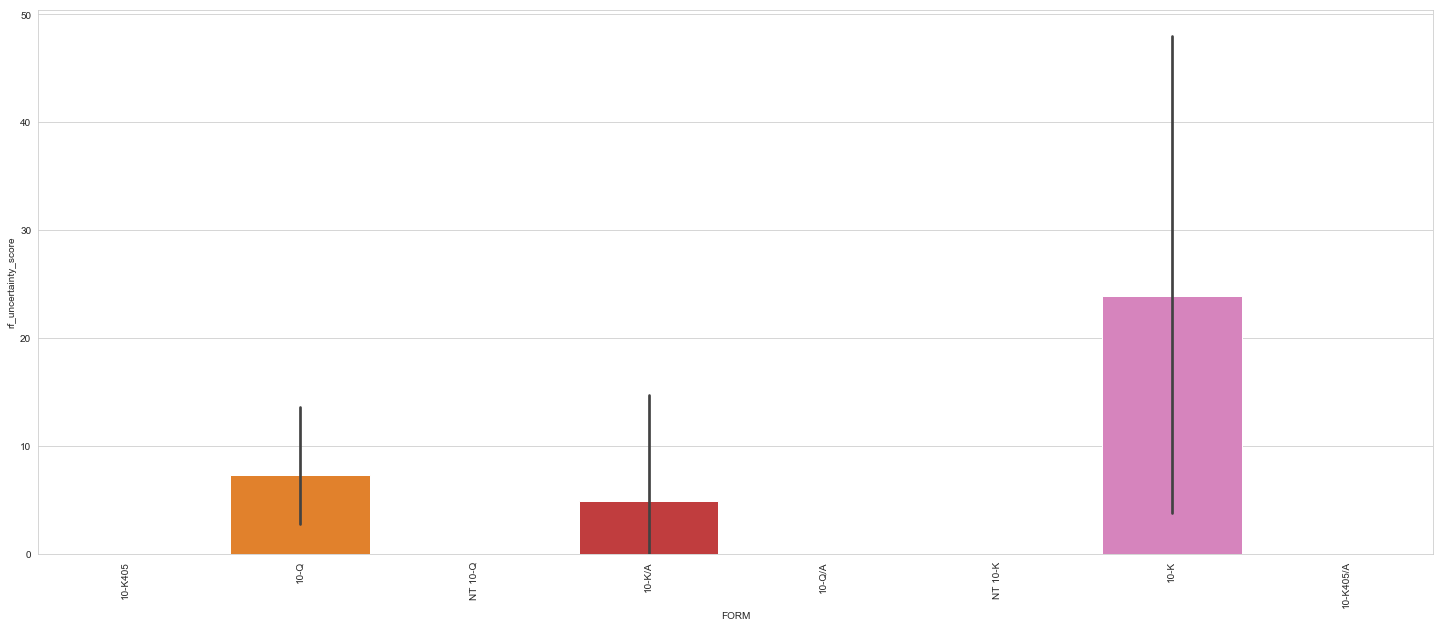

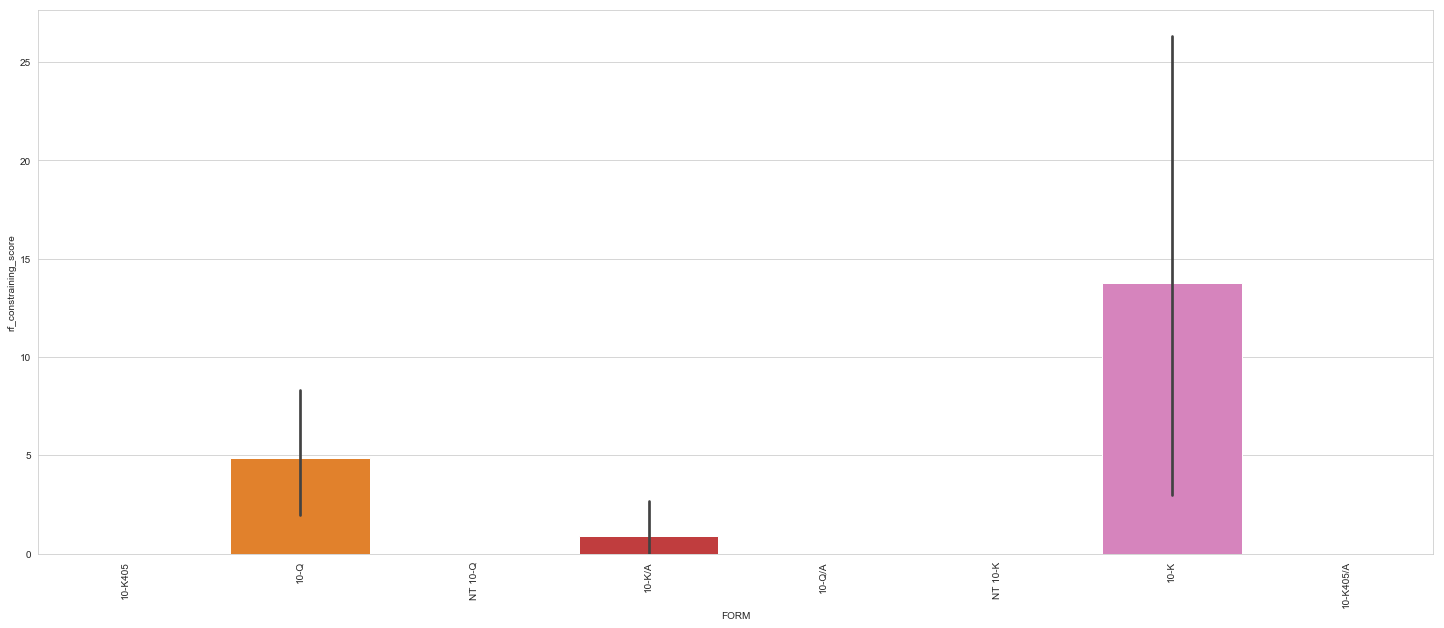

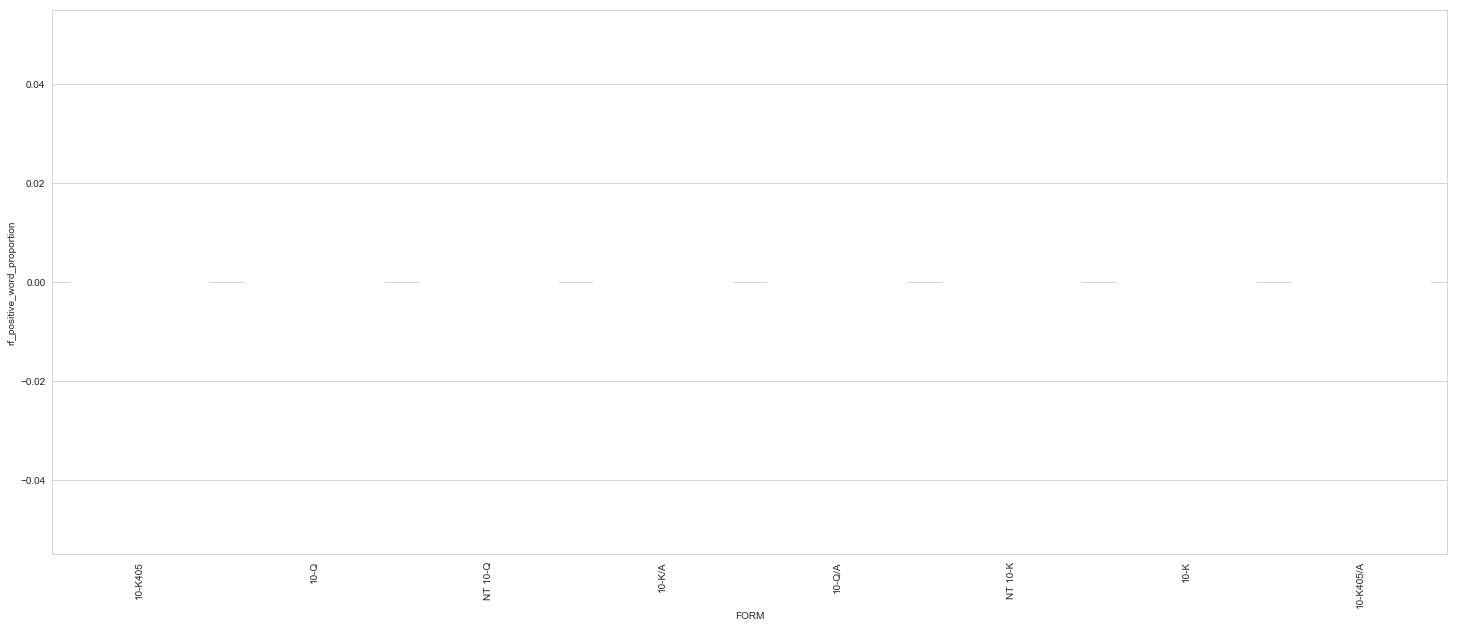

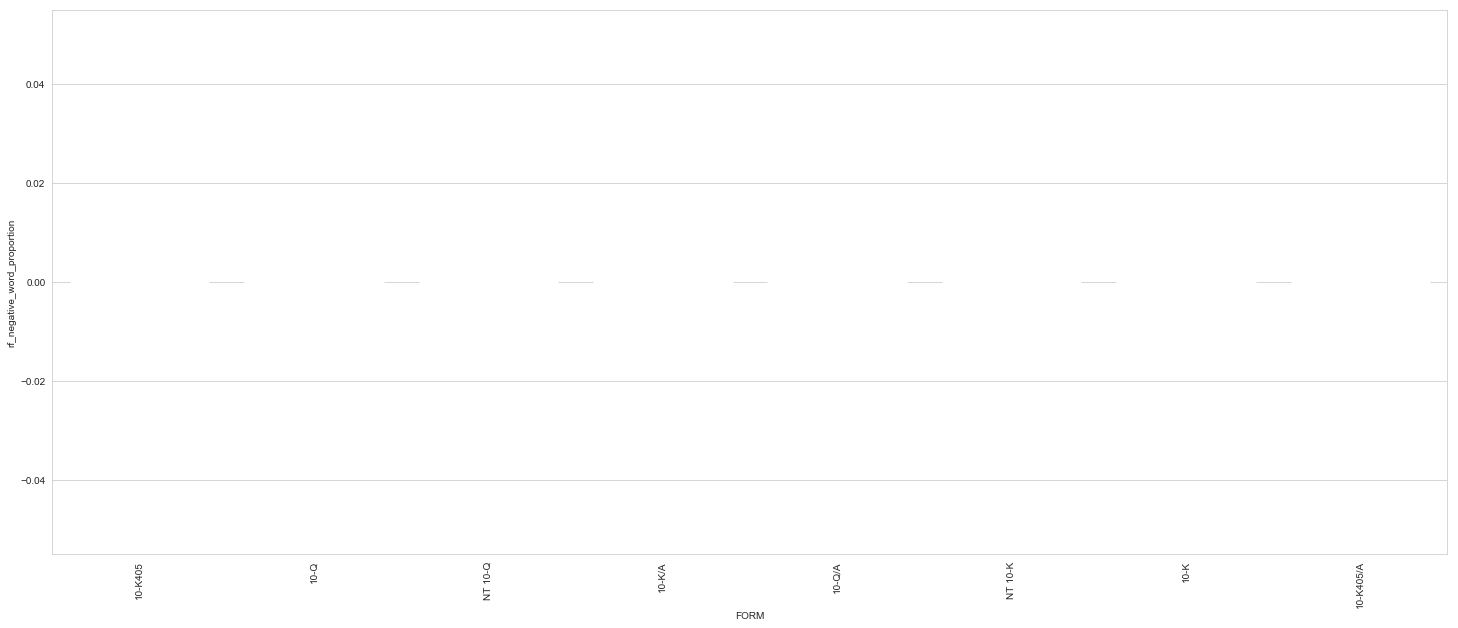

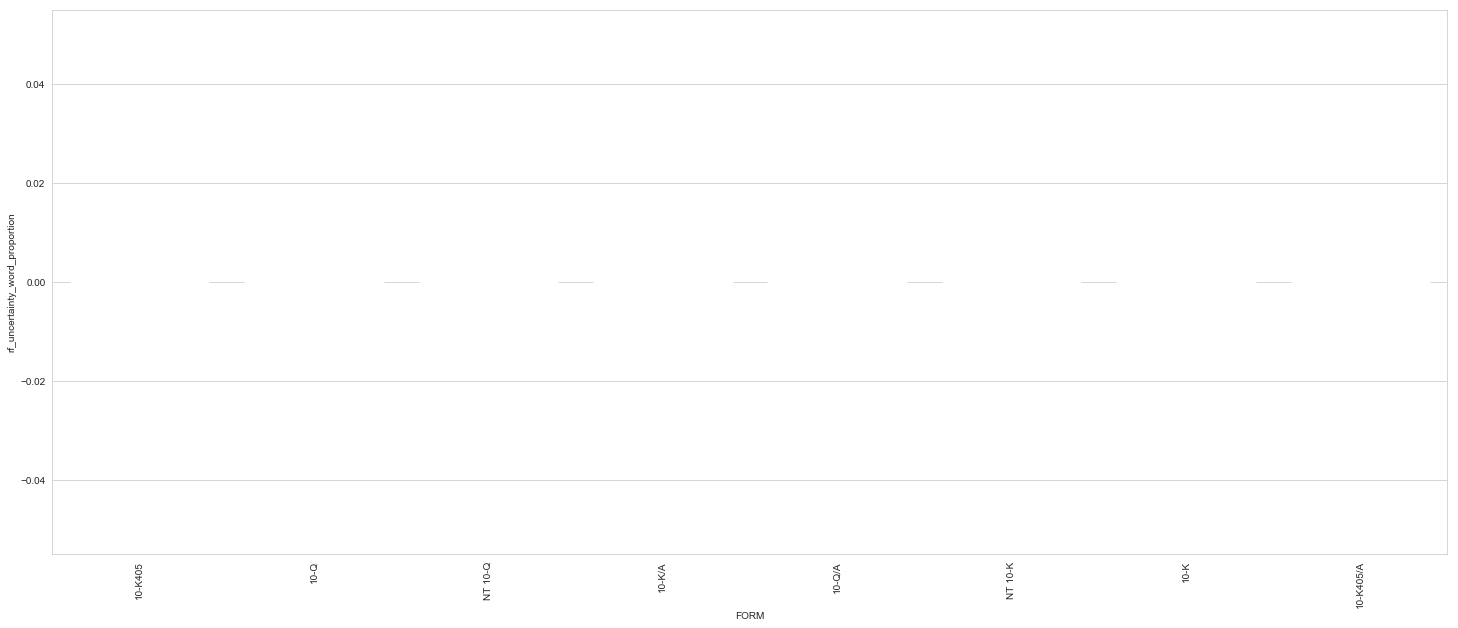

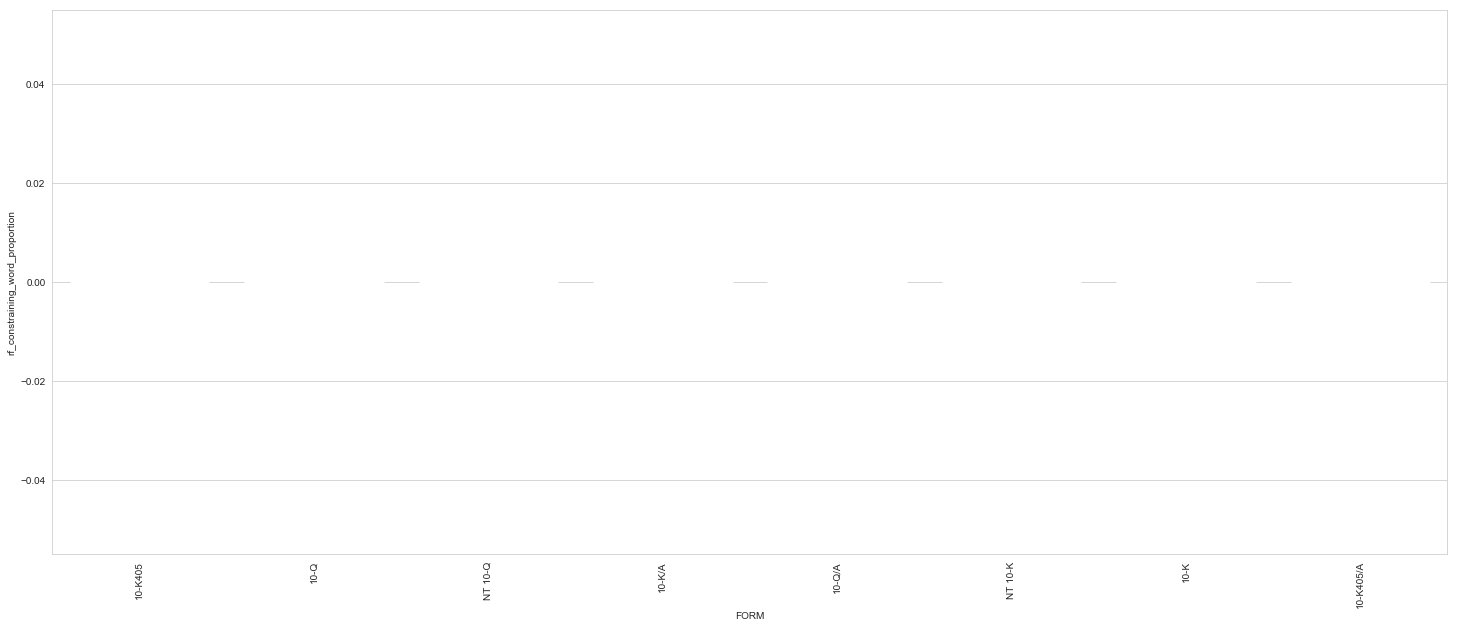

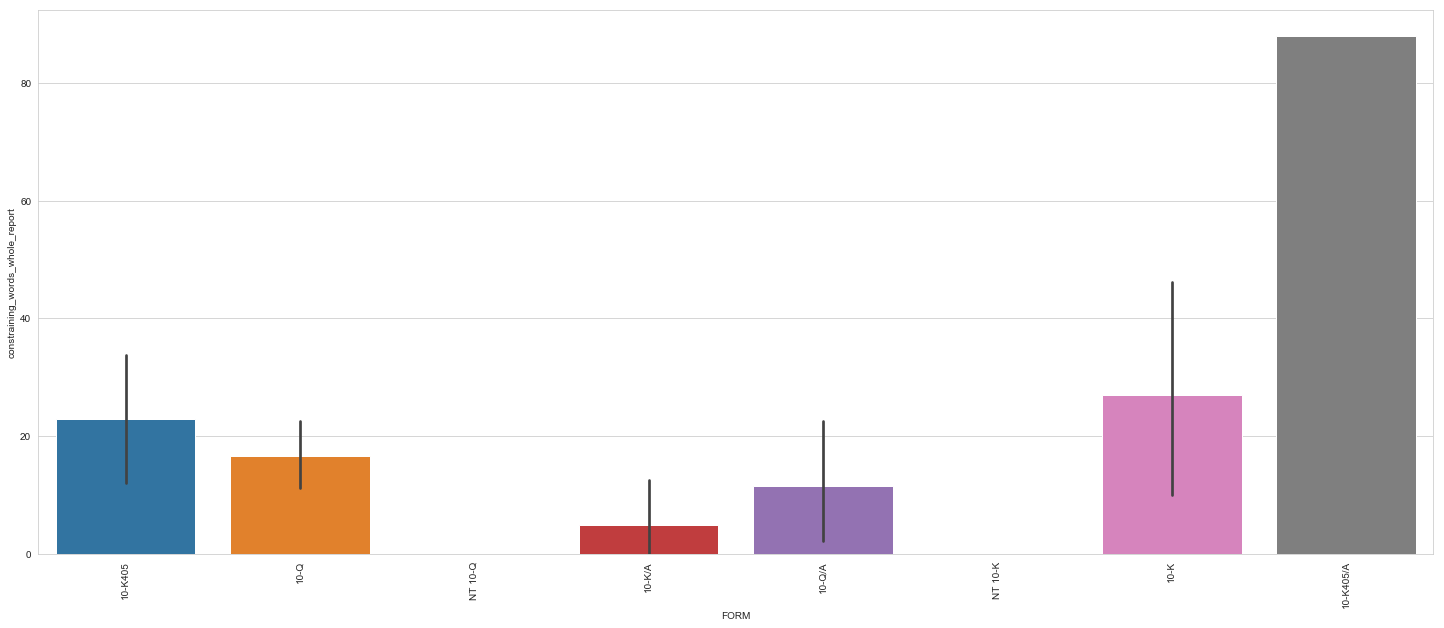

In [45]:
y=df.columns
for i in range(9,len(y)):
    c=str(y[i])
    plt.figure(figsize=(25,10))
    sns.barplot(df["FORM"],df[c])
    plt.xticks(rotation=90)

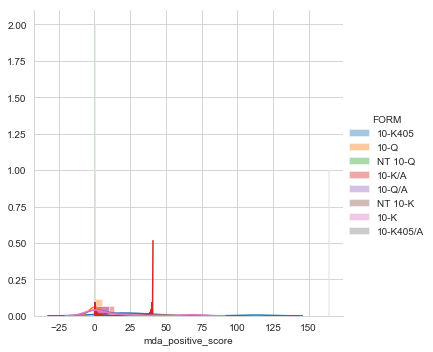

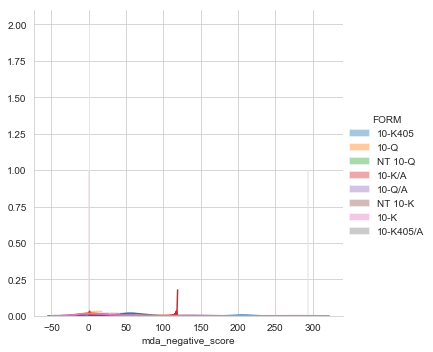

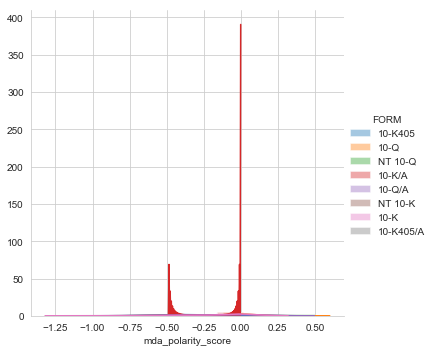

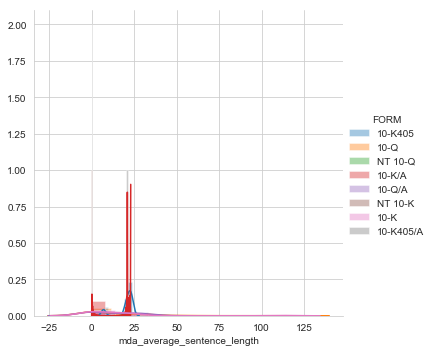

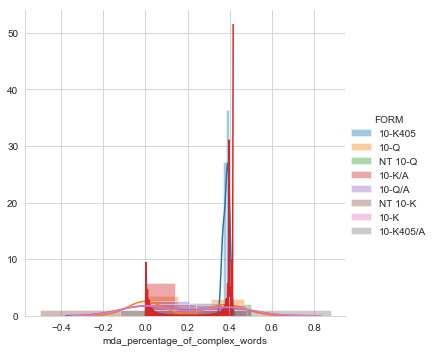

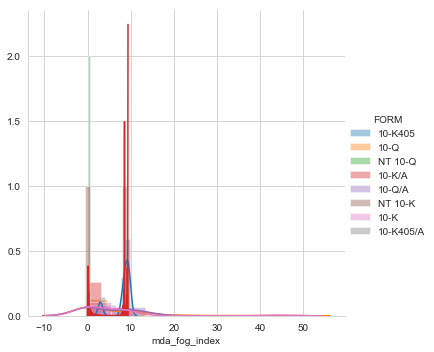

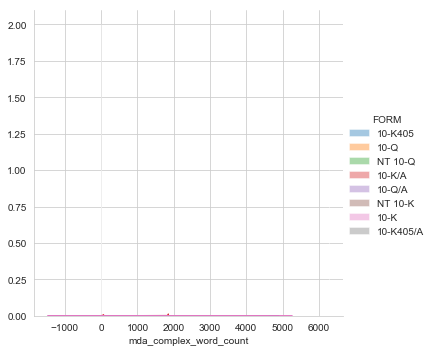

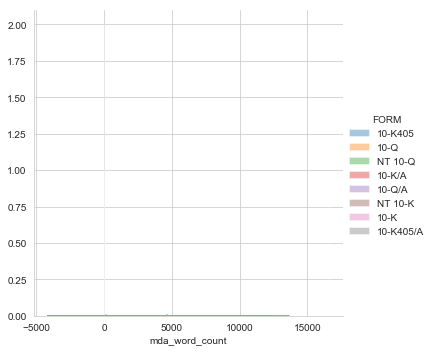

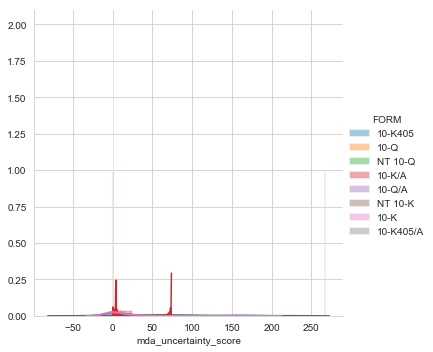

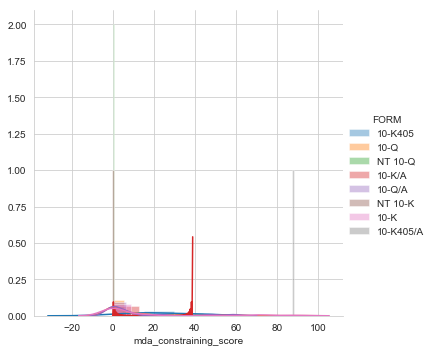

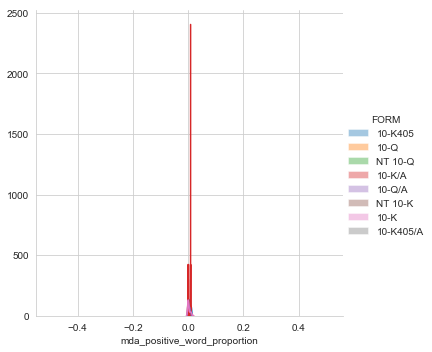

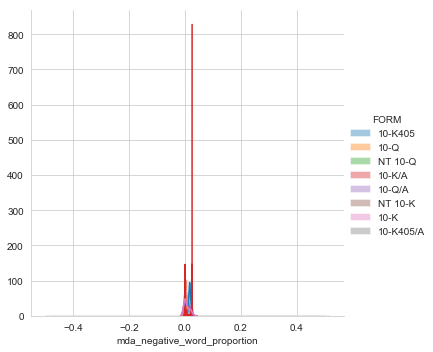

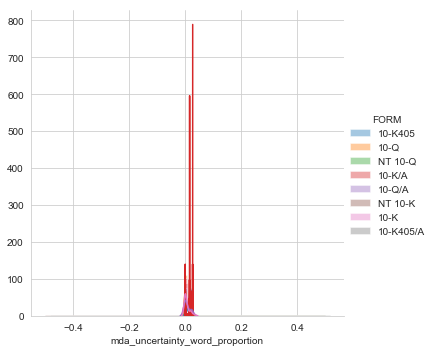

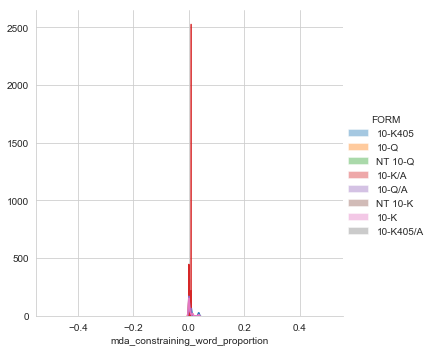

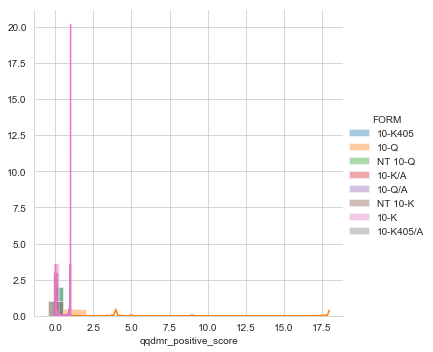

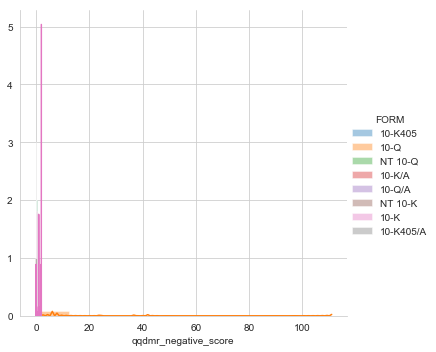

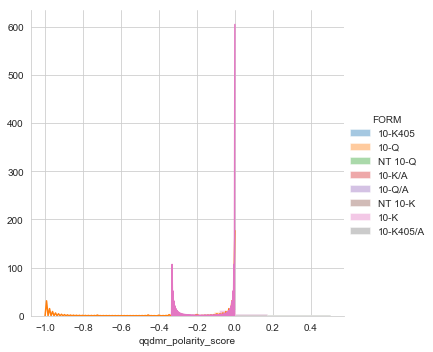

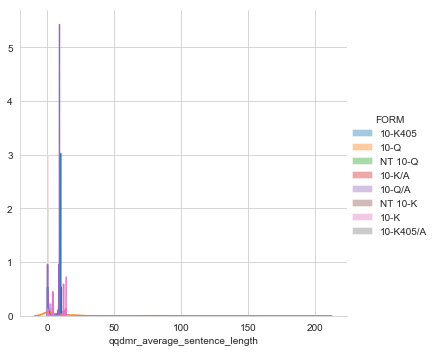

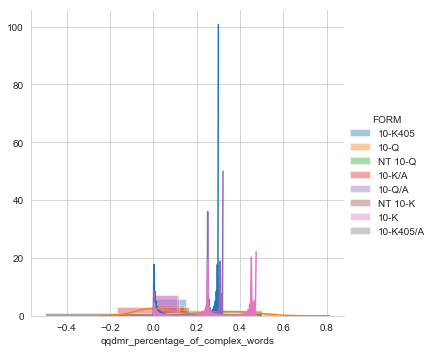

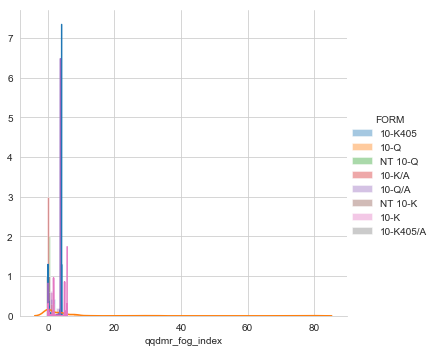

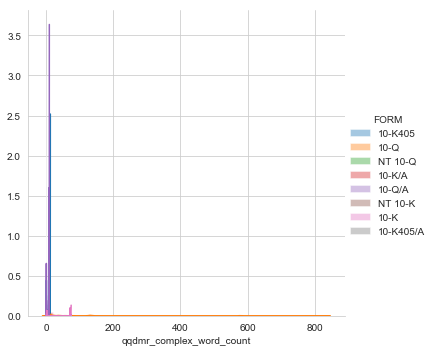

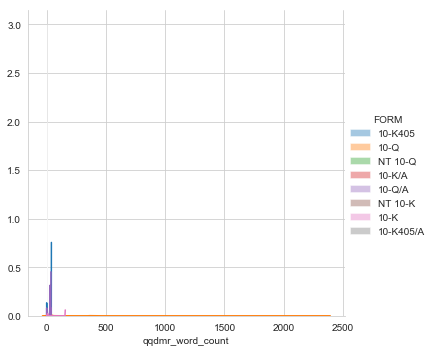

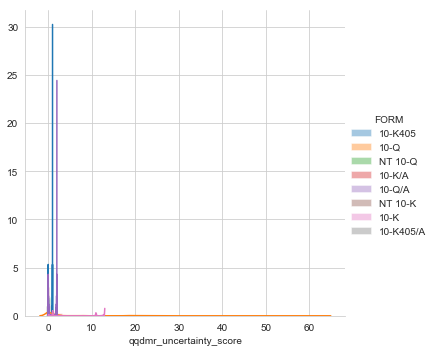

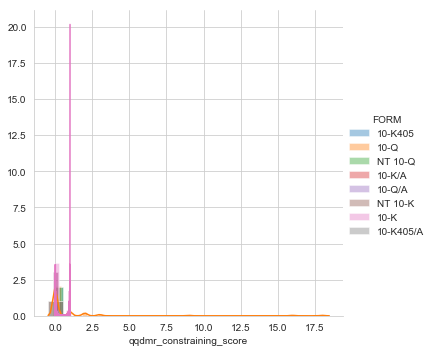

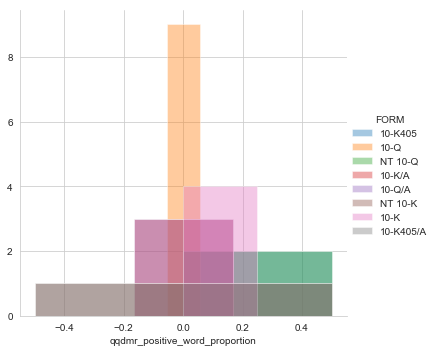

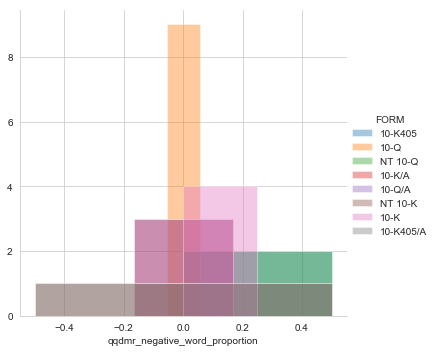

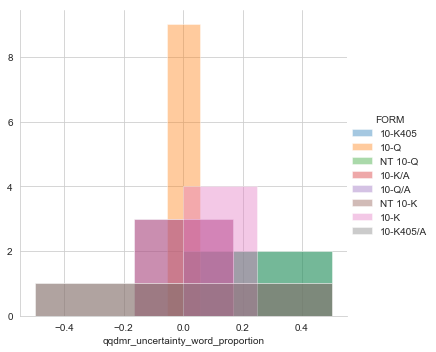

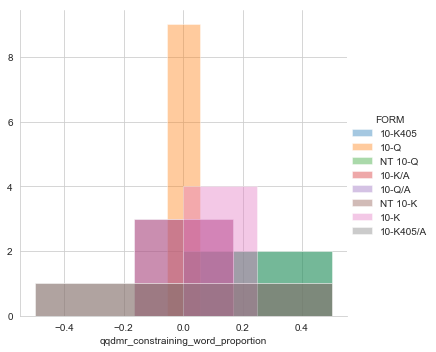

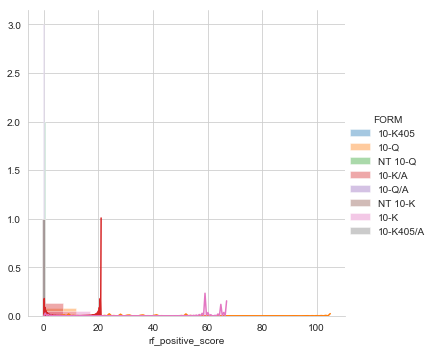

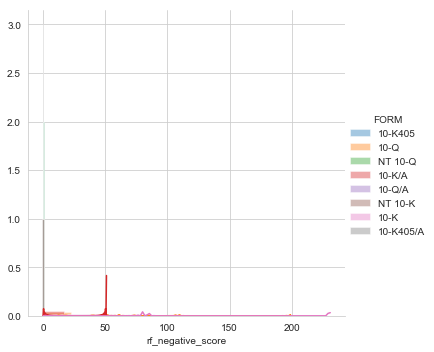

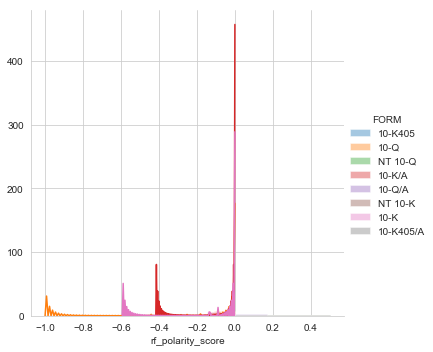

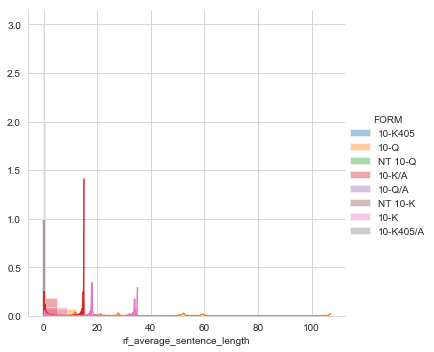

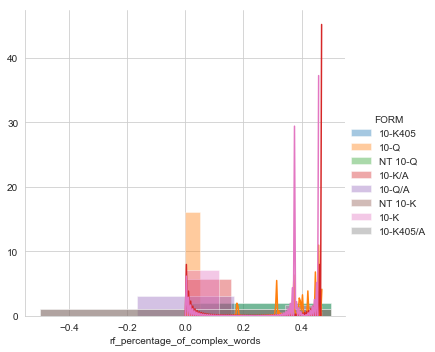

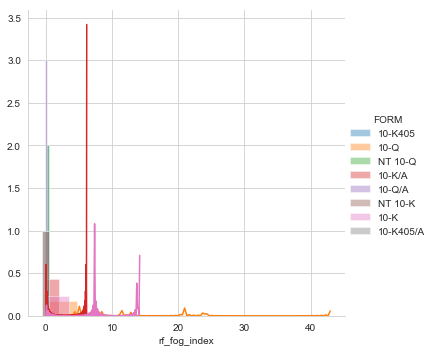

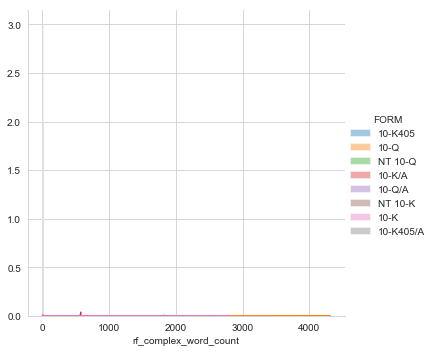

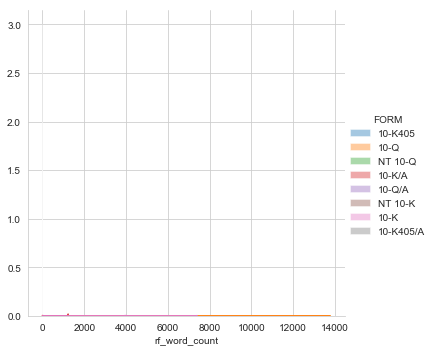

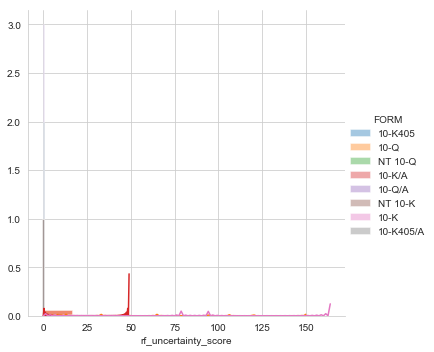

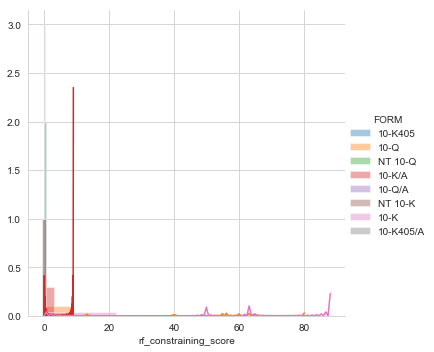

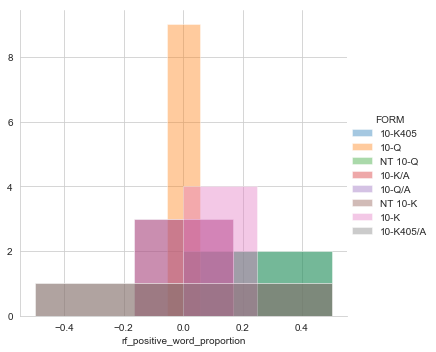

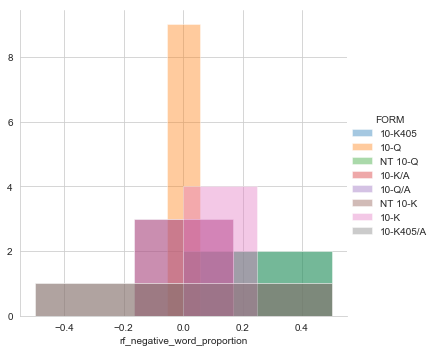

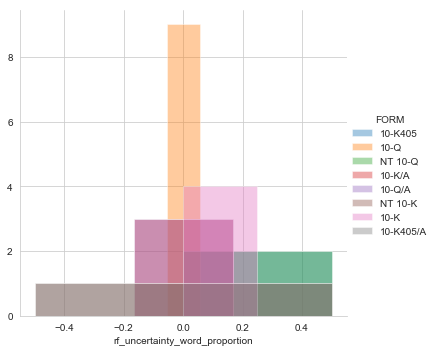

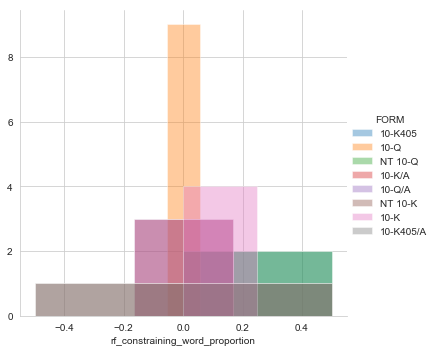

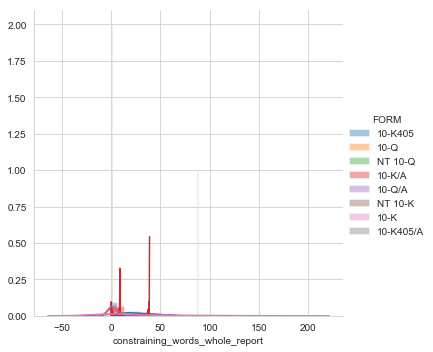

In [46]:
for i in range(9,len(y)):
    c=str(y[i])
    sns.FacetGrid(df, hue="FORM", height=5) \
       .map(sns.distplot,c) \
       .add_legend();
    plt.show();

In [40]:
dropedf=df.drop(['CIK', 'CONAME','FDATE','FYRMO','SECFNAME','mda_extract','qqd_extract','riskfactor_extract'], axis = 1) 
dropedf

,FORM,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,mda_percentage_of_complex_words,mda_fog_index,mda_complex_word_count,mda_word_count,mda_uncertainty_score,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
0,10-K405,17,61,-0.564103,24,0.366640,9.746656,910,2482,23,...,0.000000,0,0,0,0,0,0,0,0,10
1,10-Q,9,46,-0.672727,30,0.411543,12.164617,763,1854,58,...,0.000000,0,0,0,0,0,0,0,0,2
2,NT 10-Q,0,0,0.000000,0,0.000000,0.000000,0,0,0,...,0.000000,0,0,0,0,0,0,0,0,0
3,10-K/A,41,119,-0.487500,23,0.397552,9.359021,1851,4656,74,...,0.000000,0,0,0,0,0,0,0,0,39
4,NT 10-Q,0,0,0.000000,0,0.000000,0.000000,0,0,0,...,0.000000,0,0,0,0,0,0,0,0,0
5,10-Q/A,19,63,-0.536585,23,0.399539,9.359816,1386,3469,83,...,0.000000,0,0,0,0,0,0,0,0,23
6,10-Q,40,106,-0.452055,22,0.393704,8.957482,1976,5019,106,...,0.000000,0,0,0,0,0,0,0,0,34
7,10-Q,38,102,-0.457143,22,0.406482,8.962593,1919,4721,109,...,0.000000,0,0,0,0,0,0,0,0,32
8,NT 10-K,0,0,0.000000,0,0.000000,0.000000,0,0,0,...,0.000000,0,0,0,0,0,0,0,0,0
9,10-K,71,271,-0.584795,23,0.396651,9.358660,3790,9555,180,...,0.000000,0,0,0,0,0,0,0,0,74


In [41]:
dropedf.describe()

,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,mda_percentage_of_complex_words,mda_fog_index,mda_complex_word_count,mda_word_count,mda_uncertainty_score,mda_constraining_score,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,...,152.000000,152.000000,152.000000,152.000000,152.000000,152.0,152.0,152.0,152.0,152.000000
mean,12.072368,27.447368,-0.158573,13.256579,0.171897,5.371390,596.289474,1552.302632,26.184211,11.203947,...,1.800112,150.460526,390.901316,7.980263,4.868421,0.0,0.0,0.0,0.0,16.585526
std,23.508235,50.128549,0.237251,21.111341,0.193196,8.497962,989.337671,2542.162749,47.849297,20.790452,...,5.750718,568.016007,1582.873231,28.946965,17.188354,0.0,0.0,0.0,0.0,29.746934
min,0.000000,0.000000,-0.999999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.000000,0.000000,-0.352632,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
75%,13.250000,45.000000,0.000000,22.250000,0.381485,9.061172,997.000000,2920.500000,28.250000,13.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,16.000000
max,164.000000,293.000000,0.294118,114.000000,0.483871,45.753742,6289.000000,16619.000000,266.000000,91.000000,...,42.949902,4314.000000,13772.000000,164.000000,88.000000,0.0,0.0,0.0,0.0,157.000000


In [42]:
p=df


In [43]:
inputTextCol = ['mda_extract','qqd_extract','riskfactor_extract']
FinalOutput = p.drop(inputTextCol, axis =1)

FinalOutput.head(20)

,CIK,CONAME,FDATE,FORM,FYRMO,SECFNAME,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
0,3662,SUNBEAM CORP/FL/,03/06/1998,10-K405,199803,edgar/data/3662/0000950170-98-000413.txt,17,61,-0.564103,24,...,0.0,0,0,0,0,0,0,0,0,10
1,3662,SUNBEAM CORP/FL/,05/15/1998,10-Q,199805,edgar/data/3662/0000950170-98-001001.txt,9,46,-0.672727,30,...,0.0,0,0,0,0,0,0,0,0,2
2,3662,SUNBEAM CORP/FL/,08/13/1998,NT 10-Q,199808,edgar/data/3662/0000950172-98-000783.txt,0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,0
3,3662,SUNBEAM CORP/FL/,11/12/1998,10-K/A,199811,edgar/data/3662/0000950170-98-002145.txt,41,119,-0.487500,23,...,0.0,0,0,0,0,0,0,0,0,39
4,3662,SUNBEAM CORP/FL/,11/16/1998,NT 10-Q,199811,edgar/data/3662/0000950172-98-001203.txt,0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,0
5,3662,SUNBEAM CORP/FL/,11/25/1998,10-Q/A,199811,edgar/data/3662/0000950170-98-002278.txt,19,63,-0.536585,23,...,0.0,0,0,0,0,0,0,0,0,23
6,3662,SUNBEAM CORP/FL/,12/22/1998,10-Q,199812,edgar/data/3662/0000950170-98-002401.txt,40,106,-0.452055,22,...,0.0,0,0,0,0,0,0,0,0,34
7,3662,SUNBEAM CORP/FL/,12/22/1998,10-Q,199812,edgar/data/3662/0000950170-98-002402.txt,38,102,-0.457143,22,...,0.0,0,0,0,0,0,0,0,0,32
8,3662,SUNBEAM CORP/FL/,03/31/1999,NT 10-K,199903,edgar/data/3662/0000950172-99-000362.txt,0,0,0.000000,0,...,0.0,0,0,0,0,0,0,0,0,0
9,3662,SUNBEAM CORP/FL/,05/11/1999,10-K,199905,edgar/data/3662/0000950170-99-000775.txt,71,271,-0.584795,23,...,0.0,0,0,0,0,0,0,0,0,74


In [44]:
FinalOutput.to_csv(r'C:/Users/saira/Desktop/blackcoffer/Data Science/Output.csv', sep=',', encoding='utf-8')

# Report

##  From the above observations of Edgar SEC filling Data Extraction and Text Analysis: 
    1.We have extracted the data from SEC filing (https://www.sec.gov/Archives)
    2.From Text Analysis:
            

In [48]:
dropedf.groupby(['FORM']).mean()

,mda_positive_score,mda_negative_score,mda_polarity_score,mda_average_sentence_length,mda_percentage_of_complex_words,mda_fog_index,mda_complex_word_count,mda_word_count,mda_uncertainty_score,mda_constraining_score,...,rf_fog_index,rf_complex_word_count,rf_word_count,rf_uncertainty_score,rf_constraining_score,rf_positive_word_proportion,rf_negative_word_proportion,rf_uncertainty_word_proportion,rf_constraining_word_proportion,constraining_words_whole_report
FORM,,,,,,,,,,,,,,,,,,,,,
10-K,13.238095,32.000000,-0.170081,13.095238,0.185036,5.312110,610.952381,1565.523810,25.047619,13.095238,...,2.031780,425.333333,1048.380952,23.857143,13.761905,0.0,0.0,0.0,0.0,26.952381
10-K/A,4.100000,11.900000,-0.048750,4.400000,0.081366,1.792546,191.300000,480.500000,7.800000,3.900000,...,0.618745,57.500000,122.700000,4.900000,0.900000,0.0,0.0,0.0,0.0,4.800000
10-K405,35.000000,70.857143,-0.317578,20.000000,0.383686,8.153475,1494.285714,3895.571429,70.428571,22.857143,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,22.857143
10-K405/A,164.000000,293.000000,-0.282276,21.000000,0.378422,8.551369,6289.000000,16619.000000,266.000000,88.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,88.000000
10-Q,10.439560,23.802198,-0.161056,15.230769,0.176670,6.162976,543.252747,1423.340659,23.549451,10.890110,...,2.469914,146.846154,397.516484,7.285714,4.857143,0.0,0.0,0.0,0.0,16.582418
10-Q/A,12.076923,32.769231,-0.221736,11.461538,0.175978,4.655007,746.769231,1912.076923,36.461538,11.538462,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11.538462
NT 10-K,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
NT 10-Q,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [49]:
dropedf.groupby(['FORM']).describe()

constraining_words_whole_report                                    \
                                    count       mean        std   min   25%   
FORM                                                                          
10-K                                 21.0  26.952381  43.357210   0.0   0.0   
10-K/A                               10.0   4.800000  12.345039   0.0   0.0   
10-K405                               7.0  22.857143  16.035675   1.0  13.5   
10-K405/A                             1.0  88.000000        NaN  88.0  88.0   
10-Q                                 91.0  16.582418  29.165454   0.0   0.0   
10-Q/A                               13.0  11.538462  19.835219   0.0   0.0   
NT 10-K                               3.0   0.000000   0.000000   0.0   0.0   
NT 10-Q                               6.0   0.000000   0.000000   0.0   0.0   

                             mda_average_sentence_length              ...     \
            50%   75%    max                       count       mean   ...      
FORM                                                                  ...      
10-K        1.0  50.0  157.0                        21.0  13.095238   ...      
10-K/A      0.0   0.0   39.0                        10.0   4.400000   ...      
10-K405    20.0  34.0   44.0                         7.0  20.000000   ...      
10-K405/A  88.0  88.0   88.0                         1.0  21.000000   ...      
10-Q        1.0  16.0  139.0                        91.0  15.230769   ...      
10-Q/A      0.0   8.0   59.0                        13.0  11.461538   ...      
NT 10-K     0.0   0.0    0.0                         3.0   0.000000   ...      
NT 10-Q     0.0   0.0    0.0                         6.0   0.000000   ...      

          rf_uncertainty_word_proportion      rf_word_count               \
                                     75%  max         count         mean   
FORM                                                                       
10-K                                 0.0  0.0          21.0  1048.380952   
10-K/A                               0.0  0.0          10.0   122.700000   
10-K405                              0.0  0.0           7.0     0.000000   
10-K405/A                            0.0  0.0           1.0     0.000000   
10-Q                                 0.0  0.0          91.0   397.516484   
10-Q/A                               0.0  0.0          13.0     0.000000   
NT 10-K                              0.0  0.0           3.0     0.000000   
NT 10-Q                              0.0  0.0           6.0     0.000000   

                                                     
                   std  min  25%  50%  75%      max  
FORM                                                 
10-K       2321.719093  0.0  0.0  0.0  0.0   7400.0  
10-K/A      388.011469  0.0  0.0  0.0  0.0   1227.0  
10-K405       0.000000  0.0  0.0  0.0  0.0      0.0  
10-K405/A          NaN  0.0  0.0  0.0  0.0      0.0  
10-Q       1682.527149  0.0  0.0  0.0  0.0  13772.0  
10-Q/A        0.000000  0.0  0.0  0.0  0.0      0.0  
NT 10-K       0.000000  0.0  0.0  0.0  0.0      0.0  
NT 10-Q       0.000000  0.0  0.0  0.0  0.0      0.0  

[8 rows x 344 columns]